# 
# 1. Import Library

In [70]:
import pandas as pd

import numpy as np
import seaborn as sns

import itertools

import matplotlib.pyplot as plt
from matplotlib import gridspec
import matplotlib.ticker as mtick
import scikitplot as skplt

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report

import pydotplus
from IPython.display import Image

from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc

from collections import Counter

# 2. Import Data

## 2.1. Basic information of the dataset

In [71]:
data = pd.read_csv('data.csv')

In [72]:
data.head(10).style

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.000000,0,> 2 Years,Yes,40454.000000,26.000000,217,1
1,2,Male,76,1,3.000000,0,1-2 Year,No,33536.000000,26.000000,183,0
2,3,Male,47,1,28.000000,0,> 2 Years,Yes,38294.000000,26.000000,27,1
3,4,Male,21,1,11.000000,1,< 1 Year,No,28619.000000,152.000000,203,0
4,5,Female,29,1,41.000000,1,< 1 Year,No,27496.000000,152.000000,39,0
5,6,Female,24,1,33.000000,0,< 1 Year,Yes,2630.000000,160.000000,176,0
6,7,Male,23,1,11.000000,0,< 1 Year,Yes,23367.000000,152.000000,249,0
7,8,Female,56,1,28.000000,0,1-2 Year,Yes,32031.000000,26.000000,72,1
8,9,Female,24,1,3.000000,1,< 1 Year,No,27619.000000,152.000000,28,0
9,10,Female,32,1,6.000000,1,< 1 Year,No,28771.000000,152.000000,80,0


In [73]:
data.shape

(381109, 12)

## 2.2. Data Understanding

| Features | Descriptions
| - - - | - - - |
| id | Unique ID for the customer |
| Gender | Gender of the customer |
| Age | Age of the customer |
| Driving_License | 0 : Customer does not have DL, 1 : Customer already has DL |
| Region_Code | Unique code for the region of the customer |
| Previously_Insured | 1 : Customer already has Vehicle Insurance,0: Customer doesn't have Vehicle Insurance |
| Vehicle_Age | Age of the Vehicle |
| Vehicle_Damage | 1 : Customer got his/her vehicle damaged in the past.0: Customer didn't get his/her vehicle damaged in he past |
| Annual_Premium | The amount customer needs to pay as premium in the year |
| PolicySalesChannel | Anonymised Code for the channel of outreaching to the customer ie. Different Agents, Over Mail, Over Phone, In Person, etc. |
| Vintage | Number of Days, Customer has been associated with the company |
| Response | 1 : Customer is interested, 0 : Customer is not interested |

## 2.3. Check for missing values

In [74]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


In [75]:
data.isnull().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

#### Missing value Checking result

There is no missing data of each column in our dataset. 

# 3. Exploratory data analysis (EDA)

## 3.1. Descriptive analysis before pre-processing data

In [76]:
data.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,190555.000000,38.822584,0.997869,26.388807,0.458210,30564.389581,112.034295,154.347397,0.122563
std,110016.836208,15.511611,0.046110,13.229888,0.498251,17213.155057,54.203995,83.671304,0.327936
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,95278.000000,25.000000,1.000000,15.000000,0.000000,24405.000000,29.000000,82.000000,0.000000
50%,190555.000000,36.000000,1.000000,28.000000,0.000000,31669.000000,133.000000,154.000000,0.000000
75%,285832.000000,49.000000,1.000000,35.000000,1.000000,39400.000000,152.000000,227.000000,0.000000
max,381109.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


#### Observation:

1. Age range is between 20 to 85. The customers' average age is 38-year-old.
2. 99.8% of customers have driving license.
3. 45% of customers have already bought vihecle insurance.
4. Annual premium range is between 2630 to 540165 and the average annual premium is 30564.
5. Customer has been associated with the company is between 10 to 299 days. The average days of customer associated with company is 154.

## 3.2. Heat Map before pre-processing data

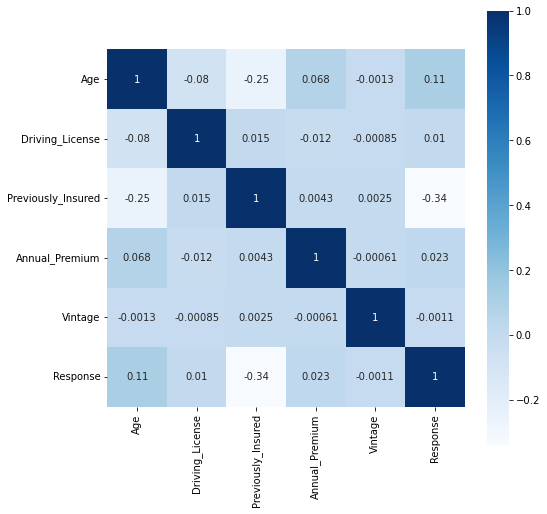

In [79]:
import seaborn as sns
plt.subplots(figsize=(8,8))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot= True, square = True, cmap = "Blues")
plt.show()

## 3.3. Target variable - "Response" column

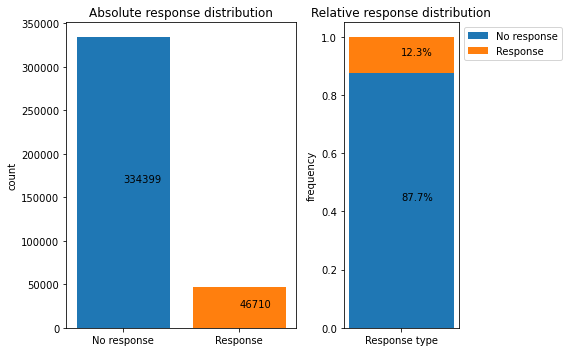

In [80]:
# plot response
keys, counts = np.unique(data.Response, return_counts=True)
counts_norm = counts/counts.sum()

fig = plt.figure(figsize=(8, 5)) #specify figure size
gs = gridspec.GridSpec(1, 2, width_ratios=[2,1]) #specify relative size of left and right plot

#Absolute values
ax0 = plt.subplot(gs[0])
ax0 = plt.bar(['No response', 'Response'], counts, color=['#1f77b4','#ff7f0e']) #left bar plot
ax0 = plt.title('Absolute response distribution') 
ax0 = plt.ylabel('count')
ax0 = plt.text(keys[0], counts[0]/2, counts[0]) #add text box with count of non-fraudulent cases
ax0 = plt.text(keys[1], counts[1]/2, counts[1]) #add text box with count of fraudulent cases

#Normalized values
ax1 = plt.subplot(gs[1])
ax1 = plt.bar(['Response type'], [counts_norm[0]], label='No response')
ax1 = plt.bar(['Response type'], [counts_norm[1]], bottom=counts_norm[0], label='Response')
ax1 = plt.legend(bbox_to_anchor=(1, 1))
ax1 = plt.title('Relative response distribution')
ax1 = plt.ylabel('frequency')
ax1 = plt.text(['Response type'],counts_norm[0]/2, '{}%'.format((counts_norm[0]*100).round(1)))
ax1 = plt.text(['Response type'],(counts_norm[1]/2)+counts_norm[0], '{}%'.format((counts_norm[1]*100).round(1)))

plt.tight_layout()
plt.show()

#### Observation

We found that our database is extremely imbalanced. The number of Non-response cases are far more than the number of Response cases.

It is necessary to conduct the resampling process for the dataset. 

## 3.4. Feature Distribution

### 3.4.1. Categorical features

#### Objective

We are trying to explore the data distribution of categorical columns, including observing the number of unique values in each columns, and determing whether we should drop some irrelevant columns or creating dummies for variables shown in string format. 

/opt/software/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


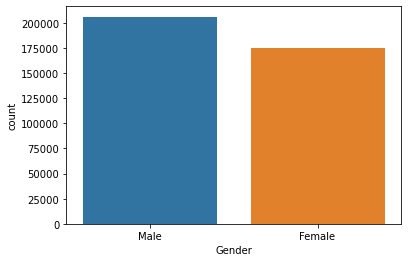

/opt/software/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


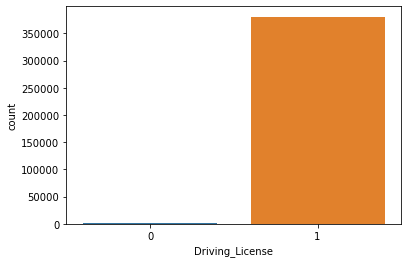

/opt/software/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


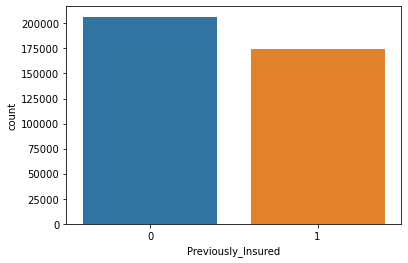

/opt/software/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


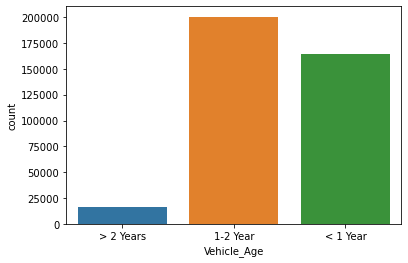

/opt/software/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


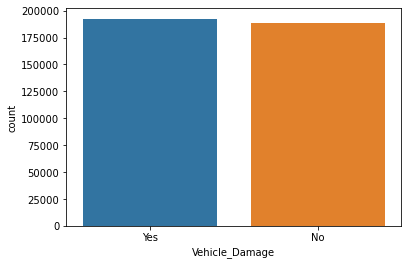

Gender ; 2
Driving_License ; 2
Previously_Insured ; 2
Vehicle_Age ; 3
Vehicle_Damage ; 2


In [81]:
cat_f = ['Gender','Driving_License','Previously_Insured','Vehicle_Age','Vehicle_Damage']

for i in cat_f:
    sns.countplot(data[i])
    plt.show()
    

for i in cat_f:
    print(i,';',len(data[i].unique()))

#### 3.4.1.1. Gender and Response

##### Objective

We decided to explore how the distribution of "Gender" will differ from the Non-response cases and the Response cases.

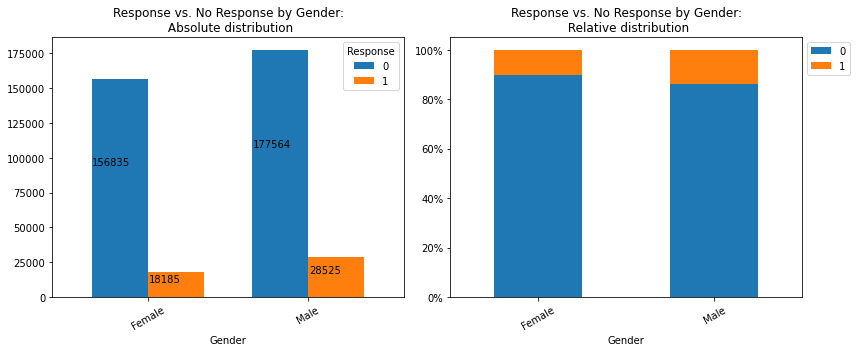

In [82]:
fig = plt.figure(figsize=(12, 5)) #specify figure size

#Absolute distribution
plt.subplot(1, 2, 1)
ax1 = data.groupby(['Gender', 'Response'])['Response'].count().unstack().plot.bar(rot=30, ax=plt.gca(), width=0.7)
plt.title('Response vs. No Response by Gender:\n Absolute distribution') 
#plot bar labels
for p in ax1.patches:
    ax1.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 0.605))

#Relative distribution
plt.subplot(1, 2, 2)
ax2 = data.groupby(['Gender', 'Response'])['Response'].size().groupby(level=0).apply(
    lambda x: 100 * x / x.sum()).unstack().plot(kind='bar',stacked=True, rot=30, ax=plt.gca())
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())
plt.legend(bbox_to_anchor=(1, 1))
plt.title("Response vs. No Response by Gender:\n Relative distribution") 
#plot bar labels
for p, q in zip(ax2.patches[0:5], ax2.patches[5:10]):
    ax2.annotate(str(round(p.get_height(),1)) + '%', (p.get_x(), p.get_height()/2))
    ax2.annotate(str(round(q.get_height(),1)) + '%', (q.get_x(), q.get_height()/2+p.get_height()))

plt.tight_layout()
plt.show()

##### Observation

We found that Male are more likely to response to our car insurance. 

#### 3.4.1.2. Driving_License and Response

##### Objective

We decided to explore how the distribution of "Driving_License" will differ from the Non-response cases and the Response cases. 

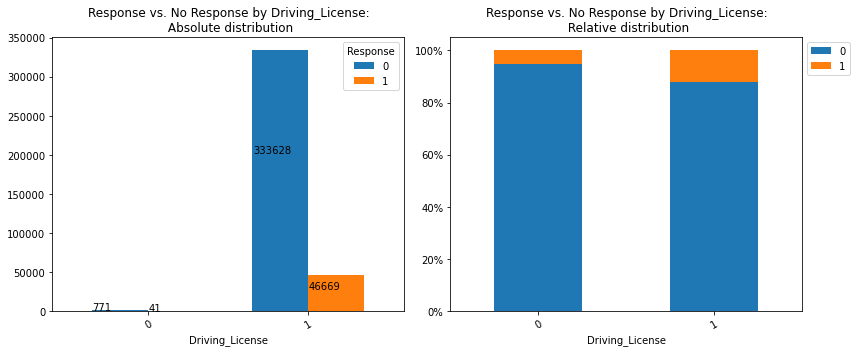

In [83]:

fig = plt.figure(figsize=(12, 5)) #specify figure size

#Absolute distribution
plt.subplot(1, 2, 1)
ax1 = data.groupby(['Driving_License', 'Response'])['Response'].count().unstack().plot.bar(rot=30, ax=plt.gca(), width=0.7)
plt.title('Response vs. No Response by Driving_License:\n Absolute distribution') 
#plot bar labels
for p in ax1.patches:
    ax1.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 0.605))

#Relative distribution
plt.subplot(1, 2, 2)
ax2 = data.groupby(['Driving_License', 'Response'])['Response'].size().groupby(level=0).apply(
    lambda x: 100 * x / x.sum()).unstack().plot(kind='bar',stacked=True, rot=30, ax=plt.gca())
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())
plt.legend(bbox_to_anchor=(1, 1))
plt.title("Response vs. No Response by Driving_License:\n Relative distribution") 
#plot bar labels
for p, q in zip(ax2.patches[0:5], ax2.patches[5:10]):
    ax2.annotate(str(round(p.get_height(),1)) + '%', (p.get_x(), p.get_height()/2))
    ax2.annotate(str(round(q.get_height(),1)) + '%', (q.get_x(), q.get_height()/2+p.get_height()))

plt.tight_layout()
plt.show()

##### Observation

We found that people who have a driving license would be more likely to response to our care insurance.

However, for this feature, the data distribution is extremely imbalanced, almost no person in our investigation scale has no driving license. Therefore, we decided to drop this column in the future. 

#### 3.4.1.3. Previously_Insured and Response

##### Objective

We decided to explore how the distribution of "Previously_Insured" will differ from the Non-response cases and the Response cases. 

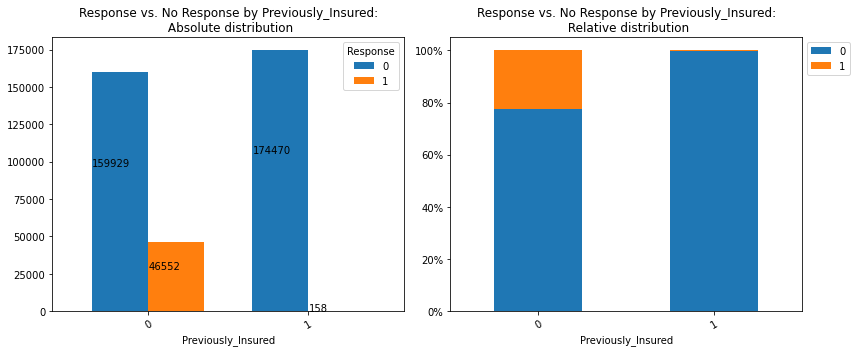

In [84]:

fig = plt.figure(figsize=(12, 5)) #specify figure size

#Absolute distribution
plt.subplot(1, 2, 1)
ax1 = data.groupby(['Previously_Insured', 'Response'])['Response'].count().unstack().plot.bar(rot=30, ax=plt.gca(), width=0.7)
plt.title('Response vs. No Response by Previously_Insured:\n Absolute distribution') 
#plot bar labels
for p in ax1.patches:
    ax1.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 0.605))

#Relative distribution
plt.subplot(1, 2, 2)
ax2 = data.groupby(['Previously_Insured', 'Response'])['Response'].size().groupby(level=0).apply(
    lambda x: 100 * x / x.sum()).unstack().plot(kind='bar',stacked=True, rot=30, ax=plt.gca())
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())
plt.legend(bbox_to_anchor=(1, 1))
plt.title("Response vs. No Response by Previously_Insured:\n Relative distribution") 
#plot bar labels
for p, q in zip(ax2.patches[0:5], ax2.patches[5:10]):
    ax2.annotate(str(round(p.get_height(),1)) + '%', (p.get_x(), p.get_height()/2))
    ax2.annotate(str(round(q.get_height(),1)) + '%', (q.get_x(), q.get_height()/2+p.get_height()))

plt.tight_layout()
plt.show()

##### Observation

We found that customers who are not previously insured by a car insurance issued by other companies are much more likely to response to our car insurance. 

#### 3.4.1.4. Vehicle_Age and Response

##### Objective

We decided to explore how the distribution of "Vehicle_Age" will differ from the Non-response cases and the Response cases. 

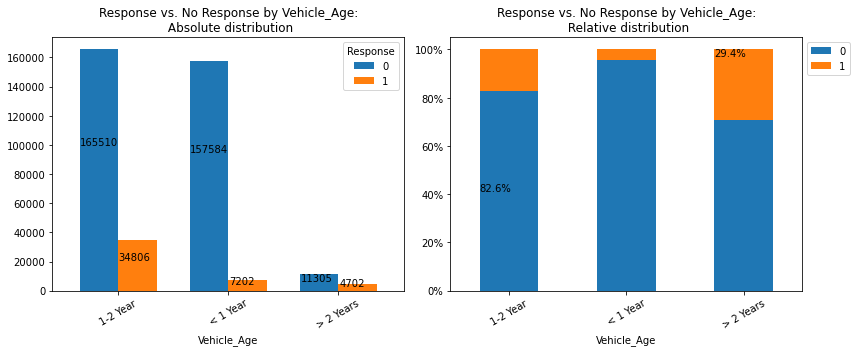

In [85]:

fig = plt.figure(figsize=(12, 5)) #specify figure size

#Absolute distribution
plt.subplot(1, 2, 1)
ax1 = data.groupby(['Vehicle_Age', 'Response'])['Response'].count().unstack().plot.bar(rot=30, ax=plt.gca(), width=0.7)
plt.title('Response vs. No Response by Vehicle_Age:\n Absolute distribution') 
#plot bar labels
for p in ax1.patches:
    ax1.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 0.605))

#Relative distribution
plt.subplot(1, 2, 2)
ax2 = data.groupby(['Vehicle_Age', 'Response'])['Response'].size().groupby(level=0).apply(
    lambda x: 100 * x / x.sum()).unstack().plot(kind='bar',stacked=True, rot=30, ax=plt.gca())
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())
plt.legend(bbox_to_anchor=(1, 1))
plt.title("Response vs. No Response by Vehicle_Age:\n Relative distribution") 
#plot bar labels
for p, q in zip(ax2.patches[0:5], ax2.patches[5:10]):
    ax2.annotate(str(round(p.get_height(),1)) + '%', (p.get_x(), p.get_height()/2))
    ax2.annotate(str(round(q.get_height(),1)) + '%', (q.get_x(), q.get_height()/2+p.get_height()))

plt.tight_layout()
plt.show()

##### Observation

We found that Customers whose car ages are older are more likely to response to our car insurance. 

Customers whose car ages are more than 2 years are more likely to response than customers whose car ages are between 1 and 2 year; customers whose car ages are between 1 and 2 year are more likely to response than customers whose car ages are less than 1 year.

#### 3.4.1.5. Vehicle_Damage and Response

##### Objective

We decided to explore how the distribution of "Vehicle_Damage" will differ from the Non-response cases and the Response cases. 

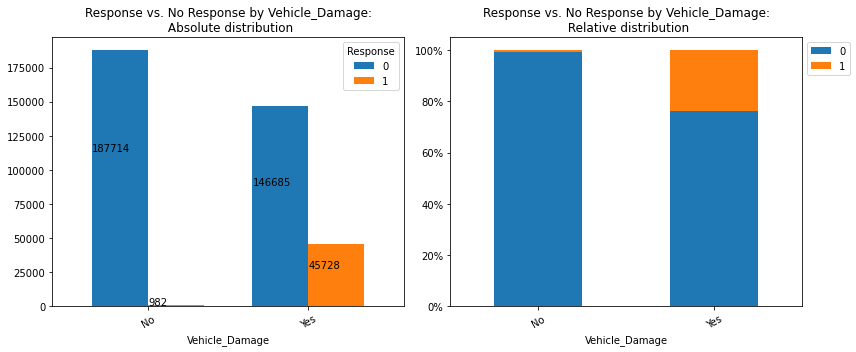

In [86]:

fig = plt.figure(figsize=(12, 5)) #specify figure size

#Absolute distribution
plt.subplot(1, 2, 1)
ax1 = data.groupby(['Vehicle_Damage', 'Response'])['Response'].count().unstack().plot.bar(rot=30, ax=plt.gca(), width=0.7)
plt.title('Response vs. No Response by Vehicle_Damage:\n Absolute distribution') 
#plot bar labels
for p in ax1.patches:
    ax1.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 0.605))

#Relative distribution
plt.subplot(1, 2, 2)
ax2 = data.groupby(['Vehicle_Damage', 'Response'])['Response'].size().groupby(level=0).apply(
    lambda x: 100 * x / x.sum()).unstack().plot(kind='bar',stacked=True, rot=30, ax=plt.gca())
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())
plt.legend(bbox_to_anchor=(1, 1))
plt.title("Response vs. No Response by Vehicle_Damage:\n Relative distribution") 
#plot bar labels
for p, q in zip(ax2.patches[0:5], ax2.patches[5:10]):
    ax2.annotate(str(round(p.get_height(),1)) + '%', (p.get_x(), p.get_height()/2))
    ax2.annotate(str(round(q.get_height(),1)) + '%', (q.get_x(), q.get_height()/2+p.get_height()))

plt.tight_layout()
plt.show()

##### Observation

We found that customers who have expreinced car damages are more likely to response to our car insurance. And the difference is significant. 

### 3.4.2. Numerical features

#### Objective

We are trying to explore the data distribution of numerical columns, including observing the number of unique values in each columns, and then determing whether we should drop some irrelevant/meaningless columns. 

/opt/software/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


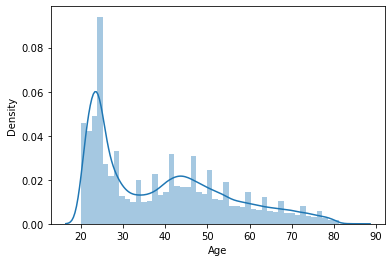

/opt/software/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


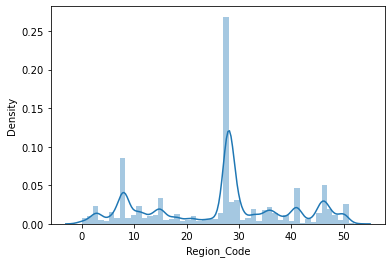

/opt/software/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


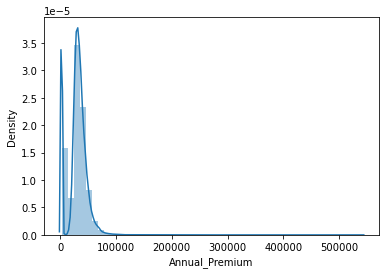

/opt/software/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


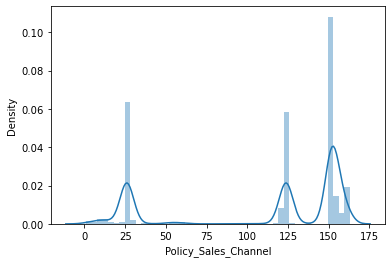

/opt/software/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


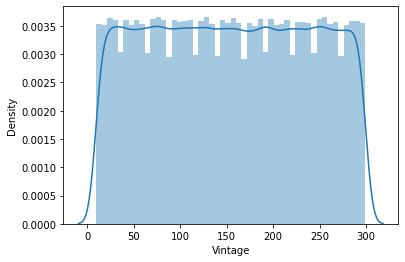

Age ; 66
Region_Code ; 53
Annual_Premium ; 48838
Policy_Sales_Channel ; 155
Vintage ; 290


In [87]:
num_f = ['Age','Region_Code','Annual_Premium','Policy_Sales_Channel','Vintage']

for i in num_f:
    sns.distplot(data[i])
    plt.show()

for i in num_f:
    print(i,';',len(data[i].unique()))

#### Observation

We found that Region_Code and Policy_Sales_Channel include chains of meaningless numbers. We did not get any additional information that could help us to utilize these data in the futrue. It is hard to combine these numbers with their real-world representation. 

So we decided to drop the 2 columns: Region_Code and Policy_Sales_Channel.

Furthermore, we found that it will be interesting to discover how the distribution of Age, Annual_Premium, and Vintage will differ in Non-response and Respnse cases. 

We decided to draw density maps for the 3 columns: Age, Annual_Premium, and Vintage.

#### 3.4.2.1. Age and Response

##### Objective

We decided to explore how the distribution of "Age" will differ from the Non-response cases and the Response cases. 

/opt/software/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/software/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Age Vs People Response And Not Response')

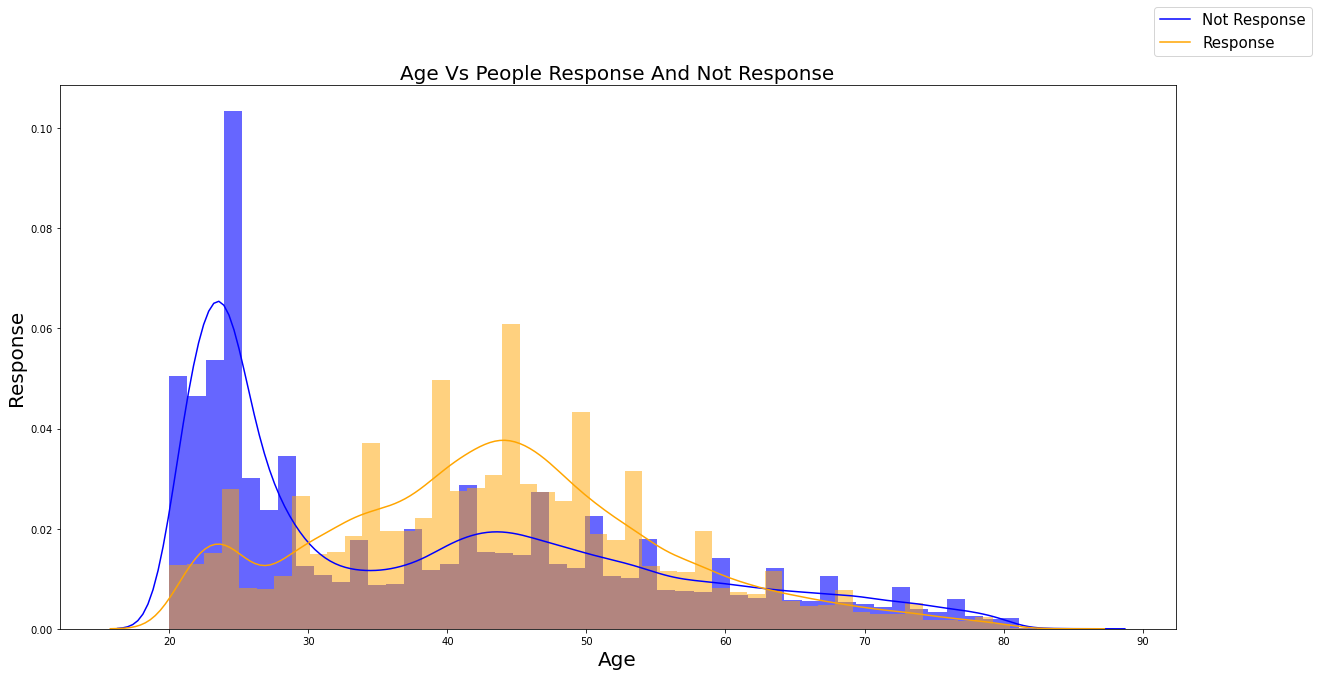

In [88]:
fig=plt.figure(figsize=(20,10))
sns.distplot(data[data['Response']==0]['Age'],color='blue',hist_kws={'alpha':0.6})
sns.distplot(data[data['Response']==1]['Age'],color='orange',hist_kws={'alpha':0.5})
fig.legend(labels=['Not Response','Response'],fontsize=15)
plt.xlabel('Age',fontsize=20)
plt.ylabel('Response',fontsize=20)
plt.title('Age Vs People Response And Not Response',fontsize=20)

##### Observation

We found that customers whose ages are between 30 and 60 are more likely to response to our car insurance that customers whose ages are between 20 and 30. 

#### 3.4.2.2. Annual_Premium and Response

##### Objective

We decided to explore how the distribution of "Annual_Premium" will differ from the Non-response cases and the Response cases. 

/opt/software/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/software/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Annual_Premium Vs People Response And Not Response')

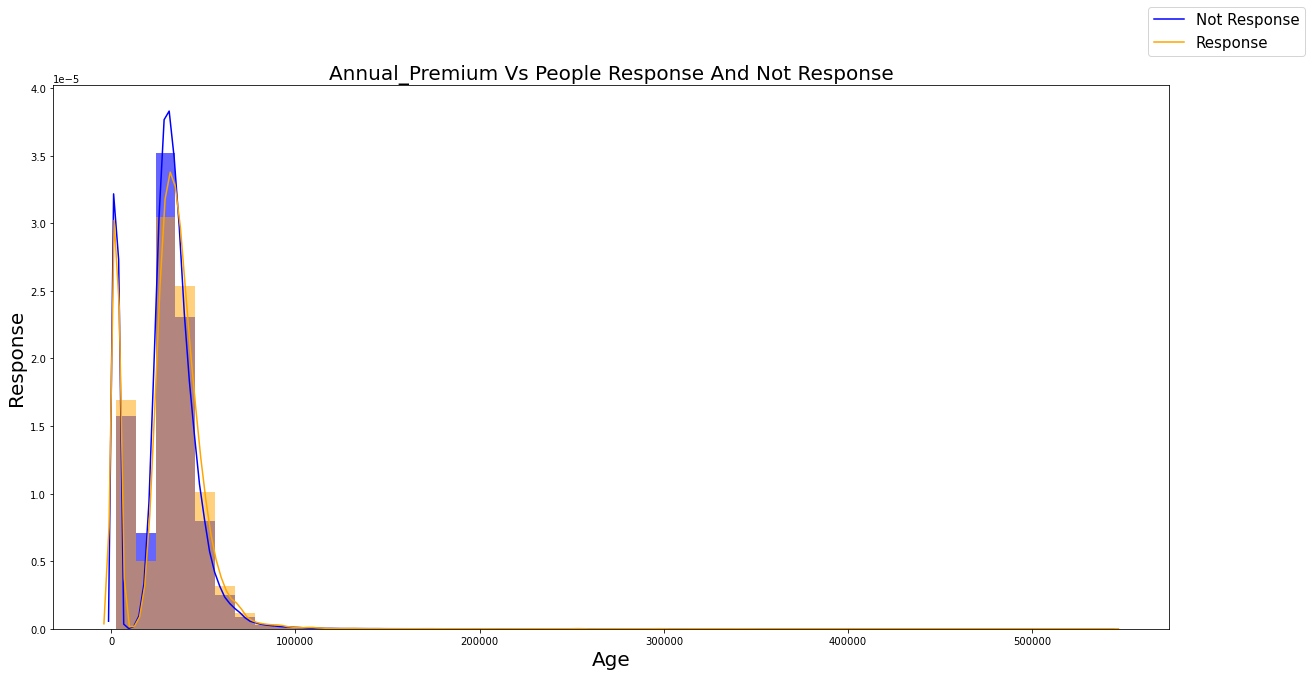

In [89]:
fig=plt.figure(figsize=(20,10))
sns.distplot(data[data['Response']==0]['Annual_Premium'],color='blue',hist_kws={'alpha':0.6})
sns.distplot(data[data['Response']==1]['Annual_Premium'],color='orange',hist_kws={'alpha':0.5})
fig.legend(labels=['Not Response','Response'],fontsize=15)
plt.xlabel('Age',fontsize=20)
plt.ylabel('Response',fontsize=20)
plt.title('Annual_Premium Vs People Response And Not Response',fontsize=20)

##### Observation

We did not find clear clues to explain the distribution of Annual_Premium Vs People Response And Not Response. 

#### 3.4.2.2. Vintage and Response

##### Objective

We decided to explore how the distribution of "Vintage" will differ from the Non-response cases and the Response cases. 

/opt/software/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/software/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Vintage Vs People Response And Not Response')

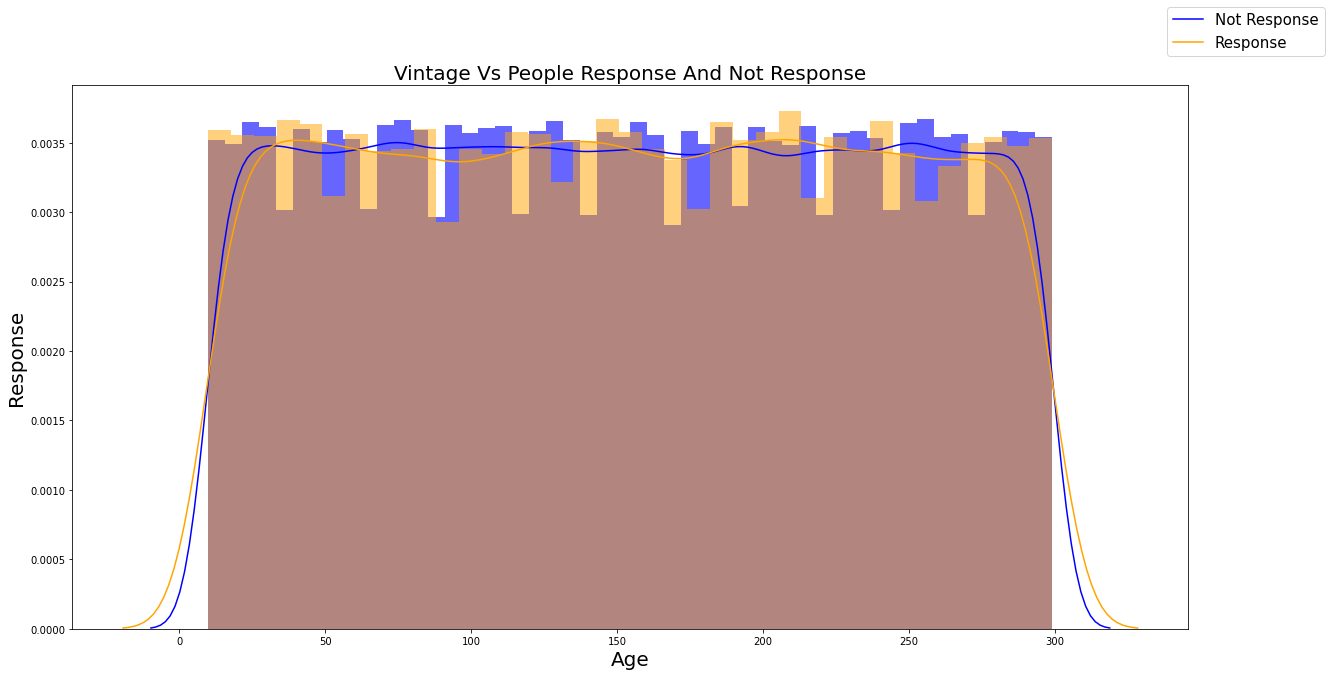

In [90]:
fig=plt.figure(figsize=(20,10))
sns.distplot(data[data['Response']==0]['Vintage'],color='blue',hist_kws={'alpha':0.6})
sns.distplot(data[data['Response']==1]['Vintage'],color='orange',hist_kws={'alpha':0.5})
fig.legend(labels=['Not Response','Response'],fontsize=15)
plt.xlabel('Age',fontsize=20)
plt.ylabel('Response',fontsize=20)
plt.title('Vintage Vs People Response And Not Response',fontsize=20)

##### Observation

We did not find clear clues to explain the distribution of Vintage Vs People Response And Not Response. 

# 4. Data Pre-processing

## 4.1. Drop data

As the reasons described in the EDA part, We decided to drop these columns: 'id','Driving_License','Region_Code', and "Policy_Sales_Channel". 

These columns provided little information and include meaningless numbers in the real world. We cannot take them into consideration for conducting the predictive models until we have enough additional information to explain them. 

In [91]:
data = data.drop(['id','Driving_License','Region_Code',"Policy_Sales_Channel"], axis=1)

## 4.2. Encode categorical variables

In [92]:
data = pd.get_dummies(data, columns=["Gender", "Vehicle_Age","Vehicle_Damage"], prefix=["Gender", "Vehicle_Age","Vehicle_Damage"], drop_first=True)
data.head()

,Age,Previously_Insured,Annual_Premium,Vintage,Response,Gender_Male,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years,Vehicle_Damage_Yes
0,44,0,40454.0,217,1,1,0,1,1
1,76,0,33536.0,183,0,1,0,0,0
2,47,0,38294.0,27,1,1,0,1,1
3,21,1,28619.0,203,0,1,1,0,0
4,29,1,27496.0,39,0,0,1,0,0


## 4.3. Data Split

The original data set was already split to 'train' and 'test', but as the 'test' data set was missing value, we decided to split the 'train' data again into 'train_new' and 'test_new'

In [93]:
X, y = data.loc[:, data.columns != 'Response'], data['Response']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 12345)

#### Visualization of the split data

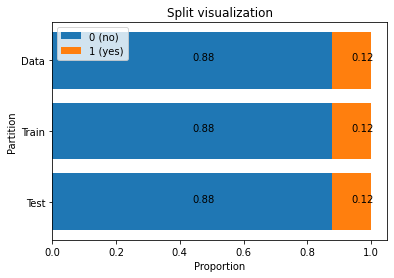

In [94]:
train_dist = y_train.value_counts() / len(y_train) #normalize absolute count values for plotting
test_dist = y_test.value_counts() / len(y_test)
data_dist = y.value_counts() / len(y)

fig, ax = plt.subplots()

ax.barh(['Test','Train','Data'], [test_dist[0], train_dist[0], data_dist[0]], color='#1f77b4', label='0 (no)')
ax.barh(['Test','Train','Data'], [test_dist[1], train_dist[1], data_dist[1]], left=[test_dist[0], train_dist[0], data_dist[0]], color='#ff7f0e', label='1 (yes)')
ax.set_title('Split visualization')
ax.legend(loc='upper left')
plt.xlabel('Proportion')
plt.ylabel('Partition')

#plot bar values
for part, a, b in zip(['Test', 'Train','Data'], [test_dist[0], train_dist[0], data_dist[0]], [test_dist[1], train_dist[1], data_dist[1]]):
    plt.text(a/2, part, str(np.round(a, 2)))
    plt.text(b/2+a, part, str(np.round(b, 2)));

## 4.4. Data Balancing

Data rebalancing with SMOTE

In [95]:
smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_resample(X_train, y_train)

In [96]:
def plot_2d_space(X, y, label='Classes', title='x', xlabel='x', ylabel='y'):   
    colors = ['#1F77B4', '#FF7F0E']
    markers = ['o', 's']
    for l, c, m in zip(np.unique(y), colors, markers):
        plt.scatter(
            X[y==l, 0],
            X[y==l, 1],
            c=c, label=l, marker=m, s=2
        )
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend(loc='upper right')

Original label Counter({0: 234078, 1: 32698})
SMOTE label Counter({0: 234078, 1: 234078})


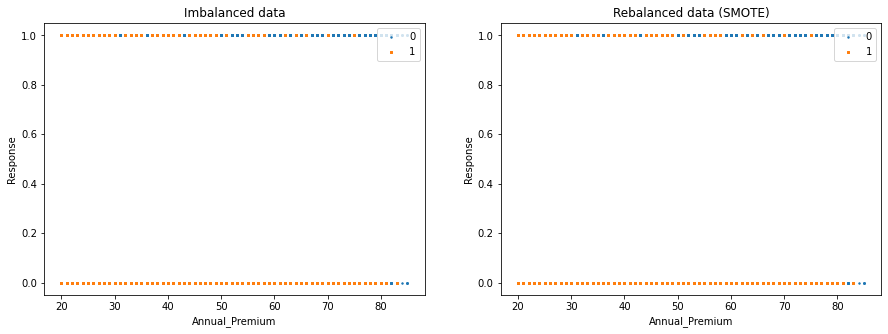

In [97]:
print('Original label %s' % Counter(y_train))
print('SMOTE label %s' % Counter(y_sm))

fig = plt.figure(figsize=(15, 5))

ax0 = plt.subplot(121)
ax0 = plot_2d_space(np.array(X_train), y_train, title='Imbalanced data', xlabel='Annual_Premium', ylabel='Response')

ax1 = plt.subplot(122)
ax1 = plot_2d_space(np.array(X_sm), y_sm, title='Rebalanced data (SMOTE)', xlabel='Annual_Premium', ylabel='Response')

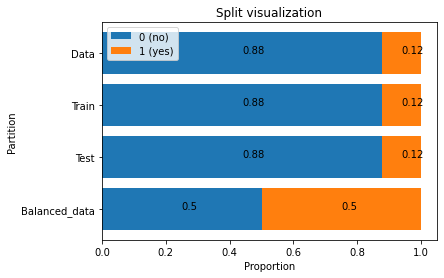

In [98]:
train_dist = y_train.value_counts() / len(y_train) #normalize absolute count values for plotting
test_dist = y_test.value_counts() / len(y_test)
data_dist = y.value_counts() / len(y)
smote_dist = pd.Series(y_sm).value_counts() / len(pd.Series(y_sm))

fig, ax = plt.subplots()

ax.barh(['Balanced_data','Test','Train','Data'], [smote_dist[0], test_dist[0], train_dist[0], data_dist[0]], color='#1f77b4', label='0 (no)')
ax.barh(['Balanced_data','Test','Train','Data'], [smote_dist[1], test_dist[1], train_dist[1], data_dist[1]], left=[smote_dist[0], test_dist[0], train_dist[0], data_dist[0]], color='#ff7f0e', label='1 (yes)')
ax.set_title('Split visualization')
ax.legend(loc='upper left')
plt.xlabel('Proportion')
plt.ylabel('Partition')

#plot bar values
for part, a, b in zip(['Balanced_data', 'Test', 'Train','Data'], [smote_dist[0], test_dist[0], train_dist[0], data_dist[0]], [smote_dist[1], test_dist[1], train_dist[1], data_dist[1]]):
    plt.text(a/2, part, str(np.round(a, 2)))
    plt.text(b/2+a, part, str(np.round(b, 2)));

## 4.5. Heat Map after pre-processing data

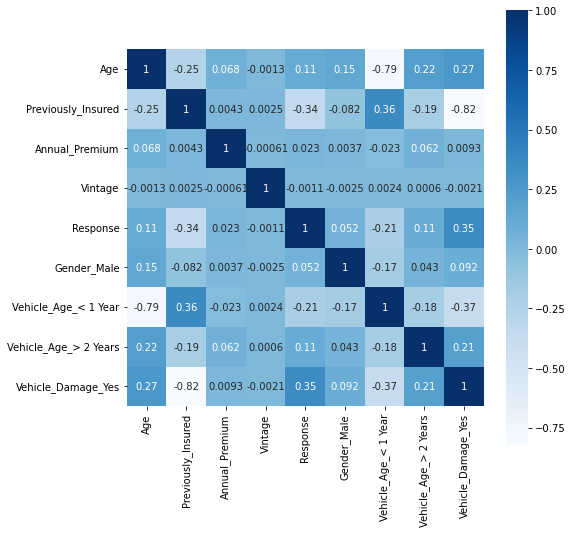

In [106]:
corr = data.corr()
plt.subplots(figsize=(8,8))
plot = sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot= True, square = True, cmap = "Blues")

# 5. Predictive Model Building

# 5.1 Decision Tree Model

### 5.1.1. Imbalanced dataset

In [107]:
tree_imb = tree.DecisionTreeClassifier(criterion = "gini", random_state = 100,
                               max_depth=3, min_samples_leaf=3).fit(X_train, y_train)

In [108]:
y_pred_tree_imb = tree_imb.predict(X_test)
y_predProba_tree_imb = tree_imb.predict_proba(X_test)
print ("DT accuracy of imbalanced data is: ", (accuracy_score(y_test, y_pred_tree_imb)*100).round(2))

DT accuracy of imbalanced data is:  87.74


#### 5.1.1.1 .Tree visualization

Fontconfig error: Cannot load default config file



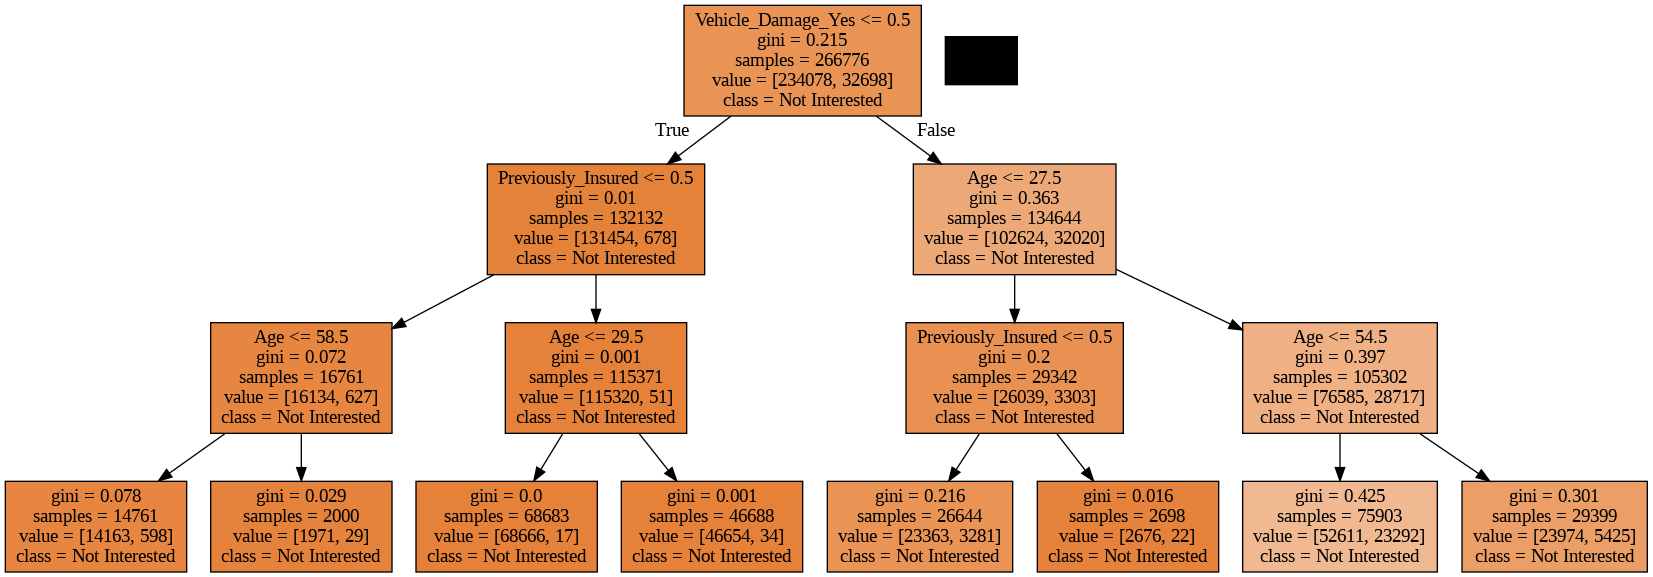

In [109]:
'''
The graphviz library is used to visualize the tree. 
'''

#Decision tree plot
import pydotplus
from IPython.display import Image 

# Create DOT data
dot_data = tree.export_graphviz(tree_imb, out_file=None, 
                                feature_names=X_train.columns, 
                                class_names=['Not Interested', 'Interested'], filled=True) #or use y_train.unique()

# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)  

# Show graph
Image(graph.create_png())

#### 5.1.1.2. Plot the feature importances of the tree

In [110]:
importances = tree_imb.feature_importances_
indices = np.argsort(importances)[::-1]
feature_order = np.array([X.columns.values])
i = np.argsort(importances)[::-1]
feature_order = feature_order[:,i]

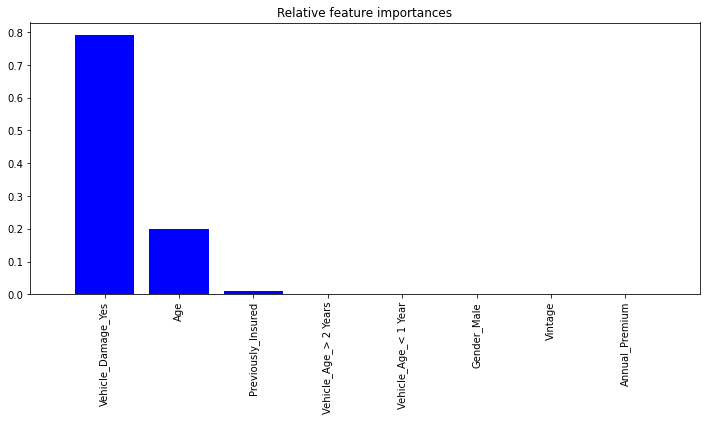

In [111]:
# Plot the feature importances of the tree
plt.figure(figsize=(12, 5))
plt.title("Relative feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="b",  align="center")
plt.xticks(range(X.shape[1]), feature_order[0], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()

In [112]:
print(classification_report(y_test, y_pred_tree_imb))

              precision    recall  f1-score   support

           0       0.88      1.00      0.93    100321
           1       0.00      0.00      0.00     14012

    accuracy                           0.88    114333
   macro avg       0.44      0.50      0.47    114333
weighted avg       0.77      0.88      0.82    114333



/opt/software/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/software/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/software/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### 5.1.2. Balanced dataset

In [113]:
tree_bal = tree.DecisionTreeClassifier(criterion = "gini", random_state = 100,
                               max_depth=3, min_samples_leaf=3).fit(X_sm, y_sm)

y_pred_tree_bal = tree_bal.predict(X_test)
y_predProba_tree_bal = tree_bal.predict_proba(X_test)
print ("DT accuracy of balanced data is: ", (accuracy_score(y_test, y_pred_tree_bal)*100).round(2))

DT accuracy of balanced data is:  74.11


#### 5.1.2.1. Tree visualization

Fontconfig error: Cannot load default config file



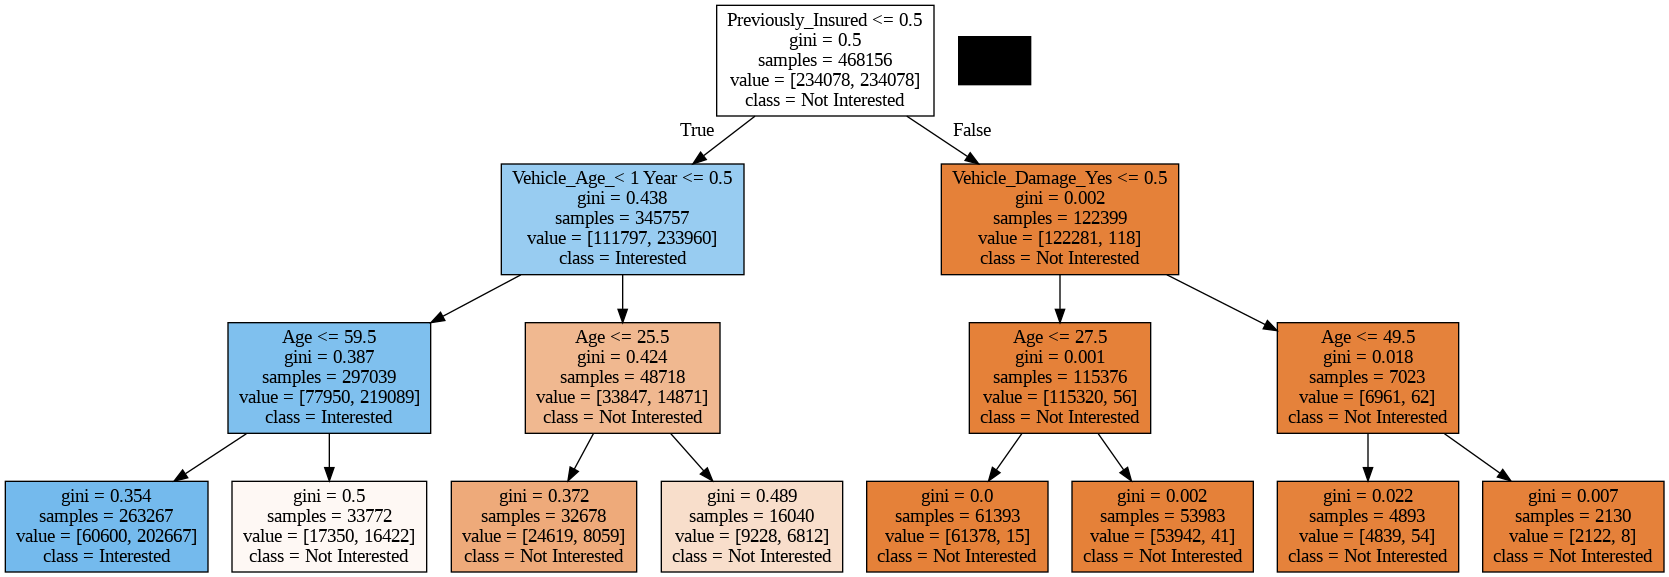

In [115]:
'''
The graphviz library is used to visualize the tree. 
'''

#Decision tree plot
import pydotplus
from IPython.display import Image 

# Create DOT data
dot_data = tree.export_graphviz(tree_bal, out_file=None, 
                                feature_names=X_train.columns, 
                                class_names=['Not Interested', 'Interested'], filled=True) #or use y_train.unique()

# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)  

# Show graph
Image(graph.create_png())

#### 5.1.2.2. Plot the feature importances of the tree

In [116]:
importances = tree_bal.feature_importances_
indices = np.argsort(importances)[::-1]
feature_order = np.array([X.columns.values])
i = np.argsort(importances)[::-1]
feature_order = feature_order[:,i]

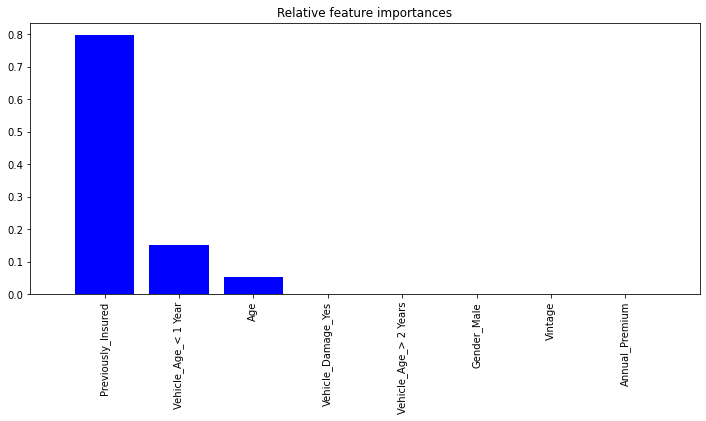

In [117]:
# Plot the feature importances of the tree
plt.figure(figsize=(12, 5))
plt.title("Relative feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="b",  align="center")
plt.xticks(range(X.shape[1]), feature_order[0], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()

In [118]:
print(classification_report(y_test, y_pred_tree_bal))

              precision    recall  f1-score   support

           0       0.95      0.74      0.83    100321
           1       0.29      0.75      0.41     14012

    accuracy                           0.74    114333
   macro avg       0.62      0.74      0.62    114333
weighted avg       0.87      0.74      0.78    114333



### 5.1.3. Model Evaluation

#### 5.1.3.1. Confusion Matrix

In [119]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        #print("Normalized confusion matrix")
    #else:
    #    print('Confusion matrix, without normalization')

    #print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylim([1.5, -0.5]) #added to fix a bug that causes the matrix to be squished
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

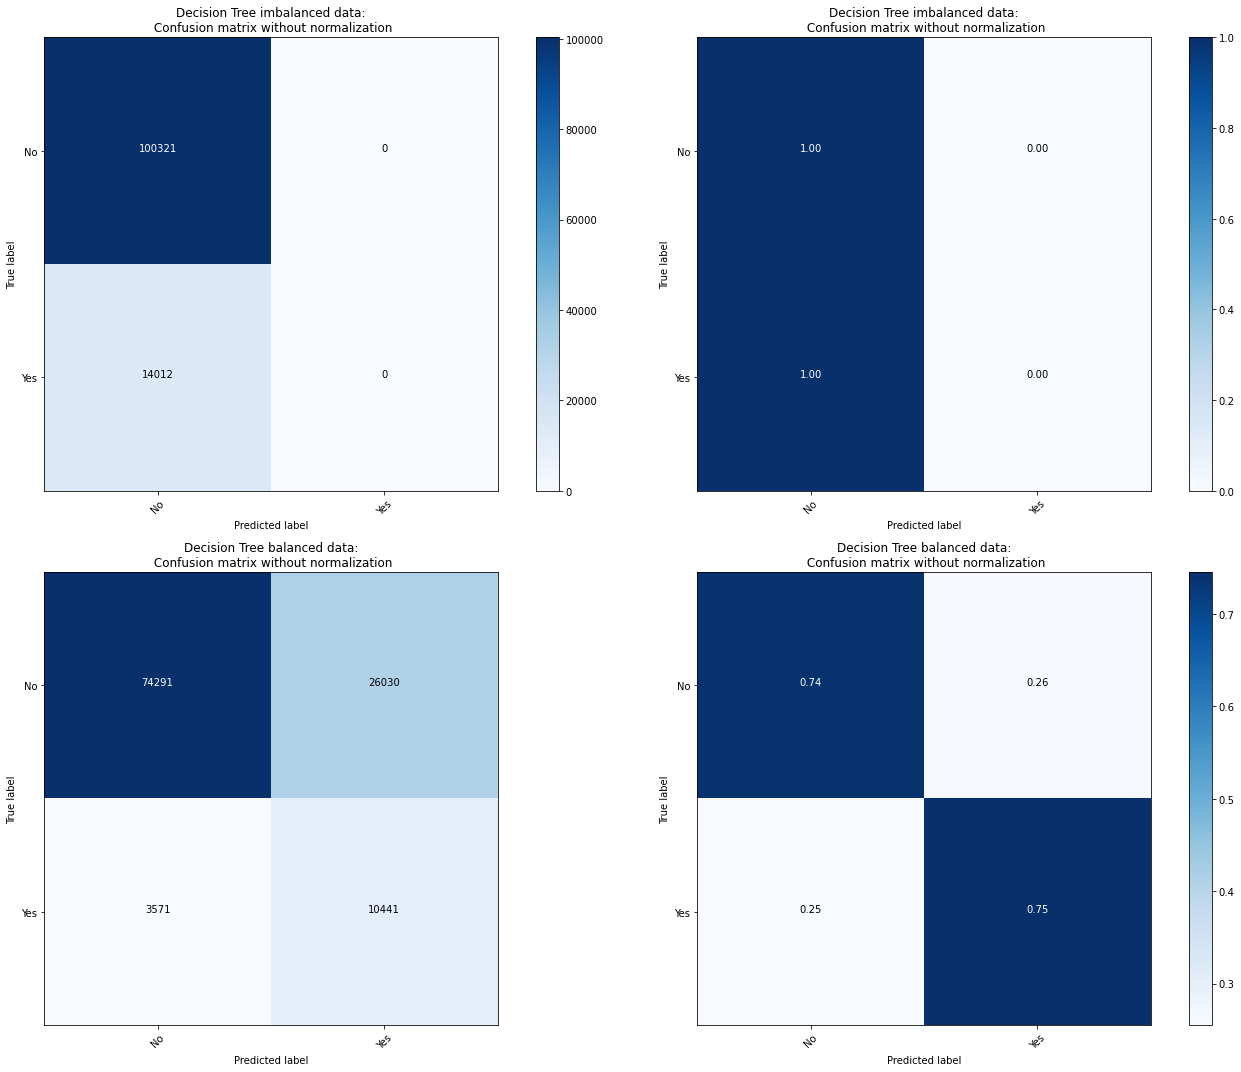

In [120]:

class_names = ['No','Yes']
cnf_matrix_tree_imb = confusion_matrix(y_test, y_pred_tree_imb)
cnf_matrix_tree_bal = confusion_matrix(y_test, y_pred_tree_bal)

np.set_printoptions(precision=2)

plt.figure(figsize=(20, 15))

#Plot Decision Tree (imbalanced) confusion matrix
plt.subplot(221)
plot_confusion_matrix(cnf_matrix_tree_imb, classes=class_names,
                      title='Decision Tree imbalanced data:\n Confusion matrix without normalization')

#Plot Decision Tree (imbalanced) normalized confusion matrix
plt.subplot(222)
plot_confusion_matrix(cnf_matrix_tree_imb, classes=class_names,normalize=True,
                      title='Decision Tree imbalanced data:\n Confusion matrix without normalization')

#Plot Decision Tree (balanced) confusion matrix
plt.subplot(223) 
plot_confusion_matrix(cnf_matrix_tree_bal, classes=class_names,
                      title='Decision Tree balanced data:\n Confusion matrix without normalization')

#Plot Decision Tree (balanced) normalized confusion matrix
plt.subplot(224) 
plot_confusion_matrix(cnf_matrix_tree_bal, classes=class_names,normalize=True,
                      title='Decision Tree balanced data:\n Confusion matrix without normalization')

plt.show()

#### 5.1.3.2. ROC & AUC

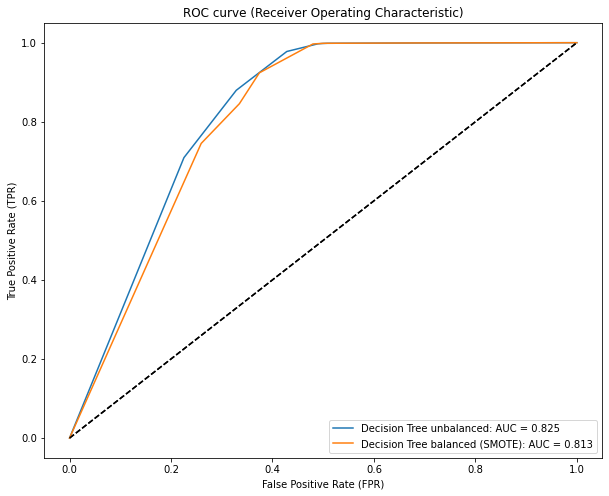

In [21]:
plt.figure(figsize=(10,8))

for test, pred, name in zip([y_test, y_test], [y_predProba_tree_imb[:,1], y_predProba_tree_bal[:,1]], ['Decision Tree unbalanced','Decision Tree balanced (SMOTE)']):
    fpr, tpr, _ = roc_curve(test, pred)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label='{}: AUC = {}'.format(name, round(roc_auc, 3)))
    plt.legend(loc='best')
    plt.plot([0,1],[0,1],color='black', linestyle='--')

plt.title('ROC curve (Receiver Operating Characteristic)')    
plt.ylabel('True Positive Rate (TPR)')
plt.xlabel('False Positive Rate (FPR)')

plt.show()

## 5.2. Logistics Regression

### 5.2.1. Imbalanced data

In [22]:
lr_ibal = LogisticRegression().fit(X_train, y_train)

In [23]:
y_pred_lr_ibal = lr_ibal.predict(X_test)
y_predProba_lr_ibal = lr_ibal.predict_proba(X_test)
print ("LR accuracy of imbalanced data is: ", (accuracy_score(y_test, y_pred_lr_ibal)*100).round(2))

LR accuracy of imbalanced data is:  87.55


### 5.2.2. Balanced data

In [24]:
lr_bal = LogisticRegression().fit(X_sm, y_sm)

In [25]:
y_pred_lr_bal = lr_bal.predict(X_test)
y_predProba_lr_bal = lr_bal.predict_proba(X_test)
print ("LR accuracy of imbalanced data is:", (accuracy_score(y_test, y_pred_lr_bal)*100).round(2))

LR accuracy of imbalanced data is: 70.94


### 5.2.3. Model Comparison

#### 5.2.3.1. Confusion Matrix

In [26]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        #print("Normalized confusion matrix")
    #else:
    #    print('Confusion matrix, without normalization')

    #print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylim([1.5, -0.5]) #added to fix a bug that causes the matrix to be squished
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

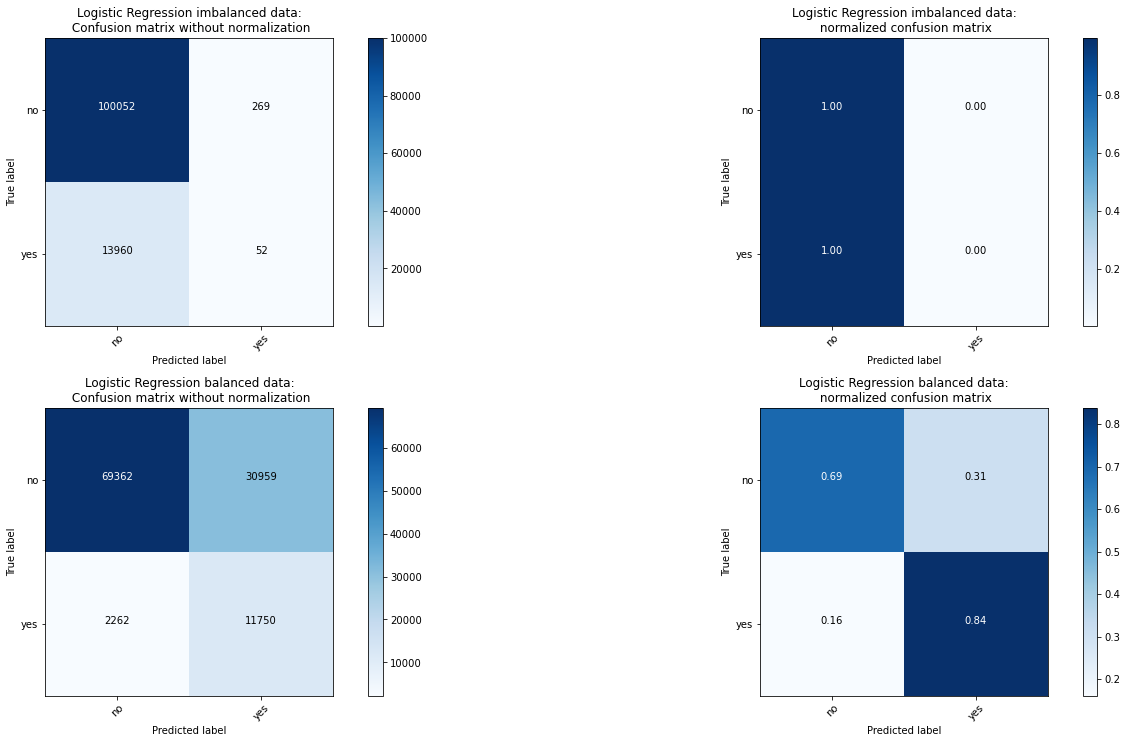

In [27]:
# Compute confusion matrix
class_names = ['no', 'yes']
cnf_matrix_lr_ibal = confusion_matrix(y_test, y_pred_lr_ibal)
cnf_matrix_lr_bal = confusion_matrix(y_test, y_pred_lr_bal)

np.set_printoptions(precision=2)

plt.figure(figsize=(20, 15))

#Plot Logistic Regression (imbalanced) confusion matrix
plt.subplot(321) 
plot_confusion_matrix(cnf_matrix_lr_ibal, classes=class_names,
                      title='Logistic Regression imbalanced data:\n Confusion matrix without normalization')

#Plot Logistic Regression (imbalanced) normalized confusion matrix
plt.subplot(322) 
plot_confusion_matrix(cnf_matrix_lr_ibal, classes=class_names, normalize=True,
                      title='Logistic Regression imbalanced data:\n normalized confusion matrix')


#Plot Logistic Regression (balanced) confusion matrix
plt.subplot(323) 
plot_confusion_matrix(cnf_matrix_lr_bal, classes=class_names,
                      title='Logistic Regression balanced data:\n Confusion matrix without normalization')

#Plot Logistic Regression (balanced) normalized onfusion matrix
plt.subplot(324) 
plot_confusion_matrix(cnf_matrix_lr_bal, classes=class_names, normalize=True,
                      title='Logistic Regression balanced data:\n normalized confusion matrix')



#### 5.2.3.2. AUC and ROC

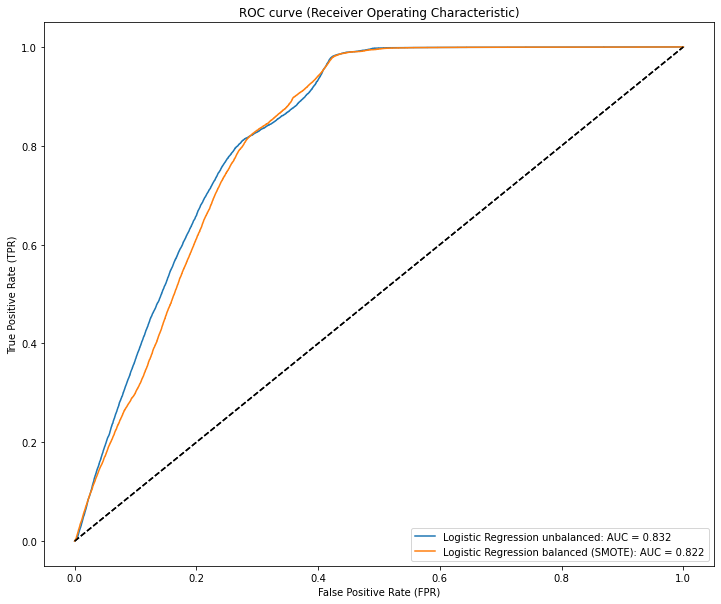

In [28]:
plt.figure(figsize=(12,10))

for test, pred, name in zip([y_test, y_test, y_test], [y_predProba_lr_ibal[:,1], y_predProba_lr_bal[:,1]], ['Logistic Regression unbalanced','Logistic Regression balanced (SMOTE)']):
    fpr, tpr, _ = roc_curve(test, pred)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label='{}: AUC = {}'.format(name, round(roc_auc, 3)))
    plt.legend(loc='best')
    plt.plot([0,1],[0,1],color='black', linestyle='--')

plt.title('ROC curve (Receiver Operating Characteristic)')    
plt.ylabel('True Positive Rate (TPR)')
plt.xlabel('False Positive Rate (FPR)')

plt.show()

## 5.3. Random Forest

### 5.3.1. Imbalance data

In [29]:
from sklearn.ensemble import RandomForestClassifier
rf_imb = RandomForestClassifier(max_depth = 3, min_samples_leaf=10,random_state=42, n_estimators=10, n_jobs=-1).fit(X_train,y_train)

In [30]:
y_pred_rf_imb = rf_imb.predict(X_test)
y_predProba_rf_imb = rf_imb.predict_proba(X_test)
print ("Accuracy is: ", (accuracy_score(y_test, y_pred_rf_imb)*100).round(2))

Accuracy is:  87.74


<BarContainer object of 8 artists>

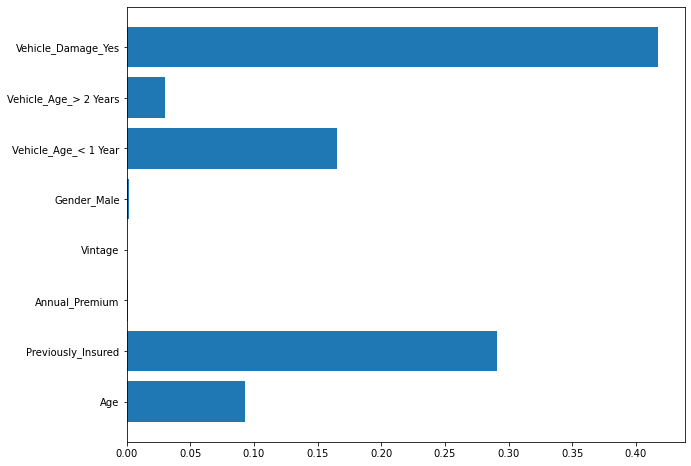

In [31]:
from matplotlib.pyplot import figure

figure(figsize=(10, 8))
plt.barh(X_train.columns, rf_imb.feature_importances_)



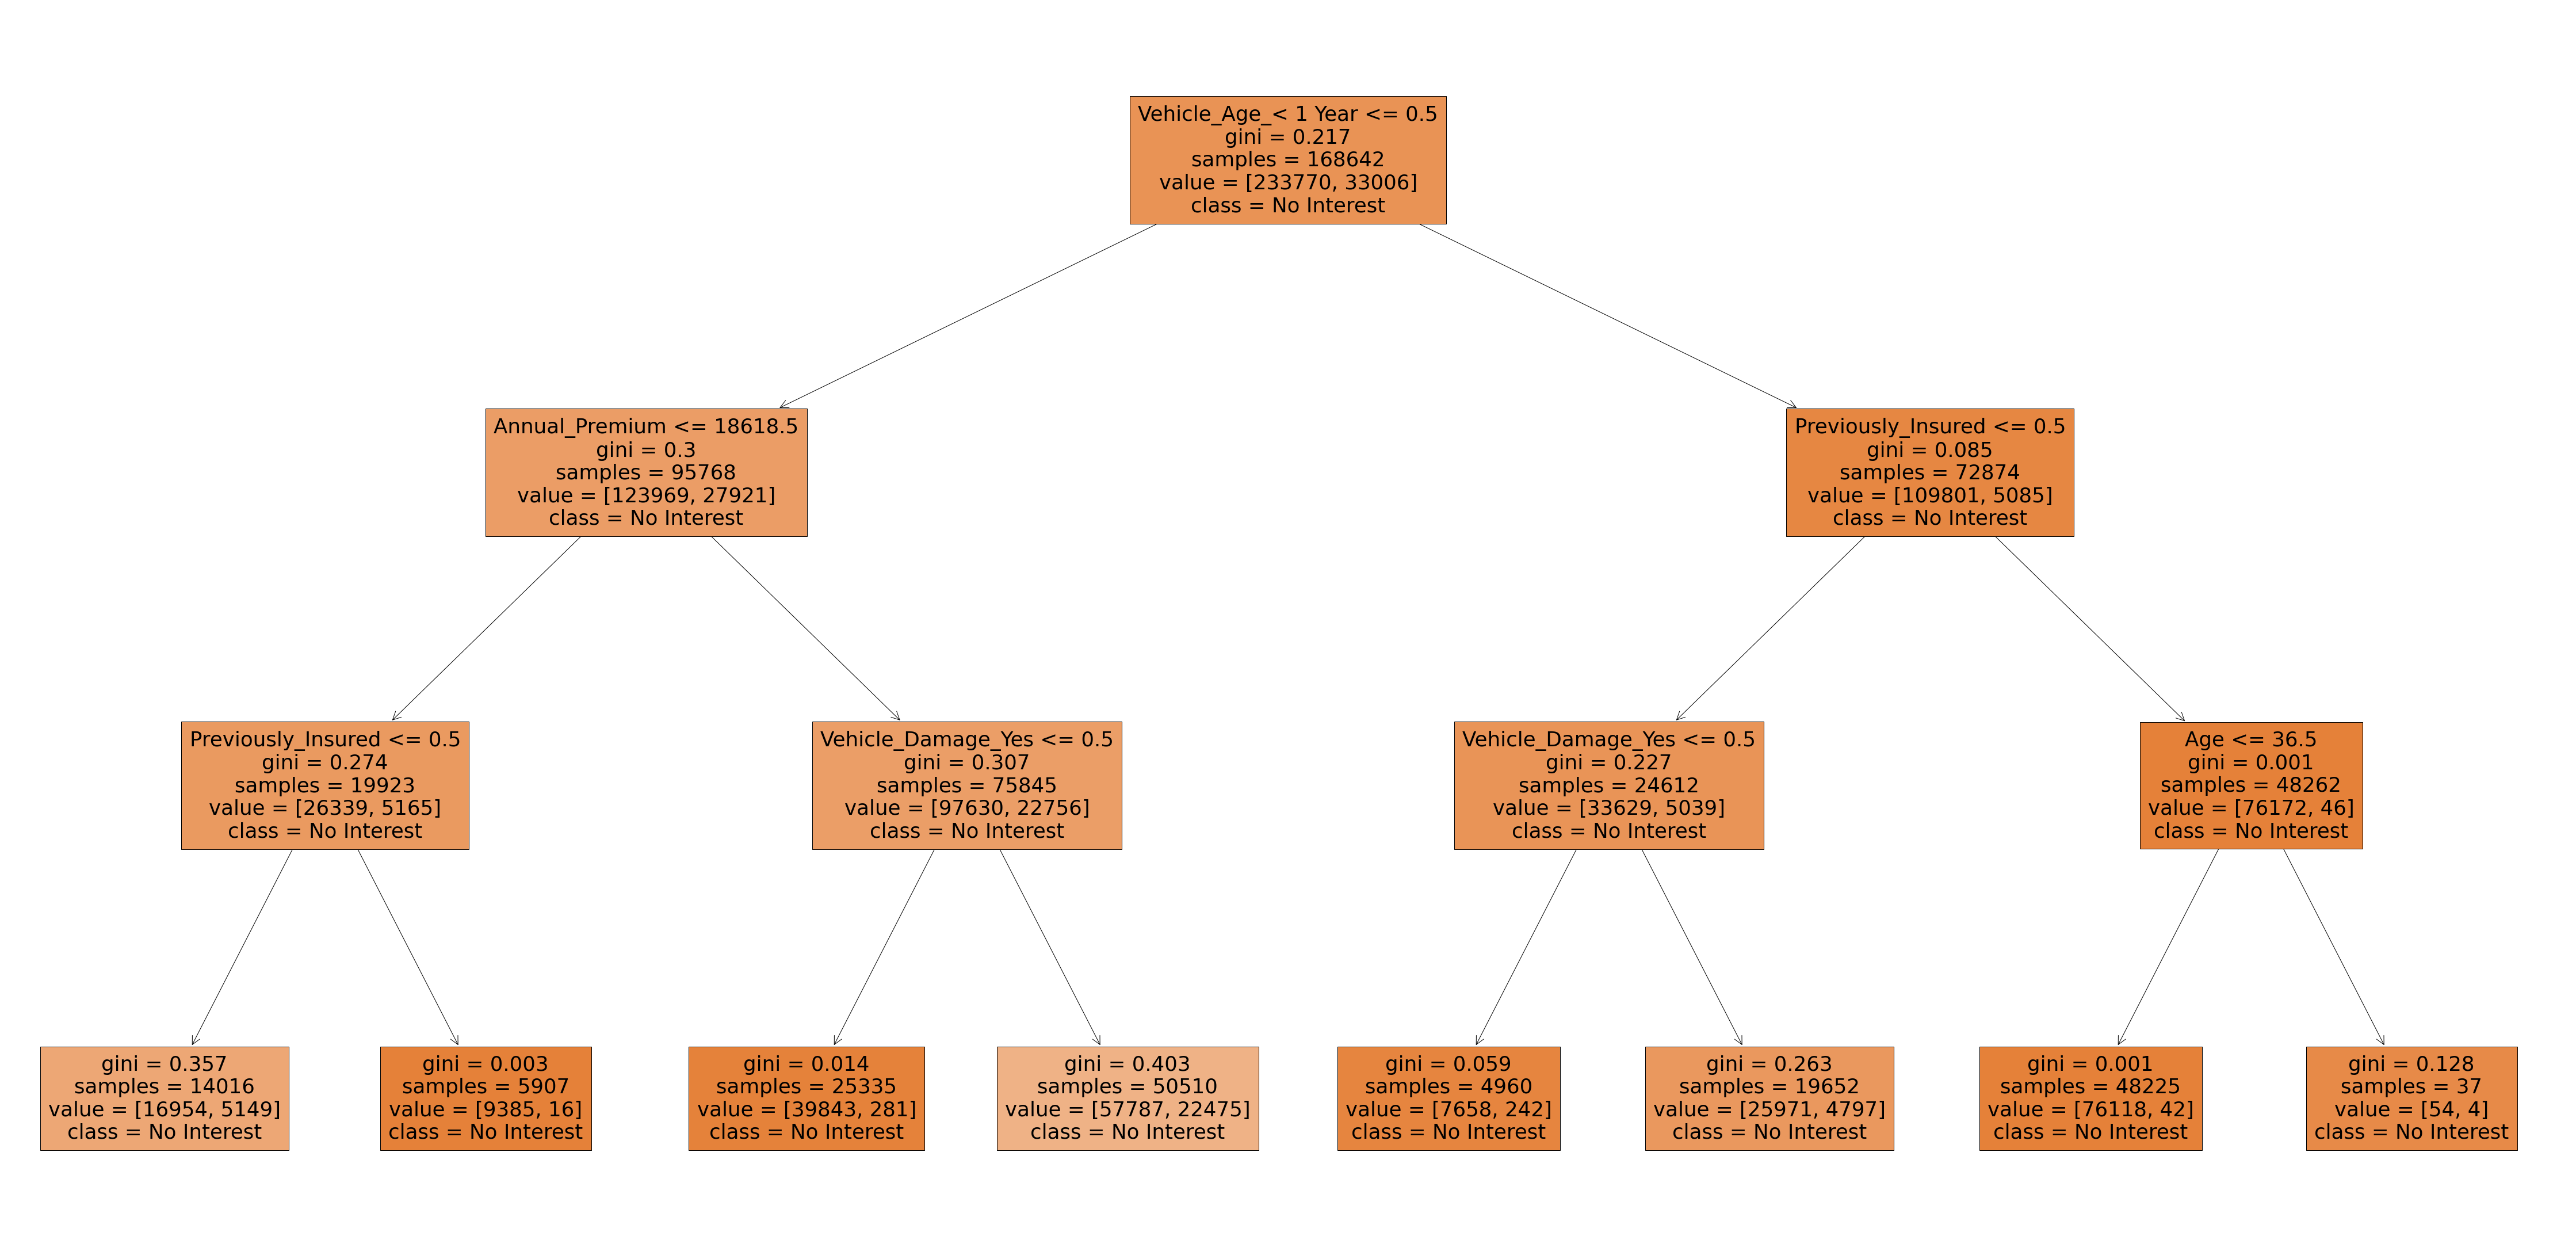

In [32]:
from sklearn.tree import plot_tree
plt.figure(figsize=(80,40))
plot_tree(rf_imb.estimators_[0], feature_names = X_train.columns,class_names=['No Interest', "Interest"],filled=True);

### 5.3.2. Balanced data

In [33]:
rf_bal = RandomForestClassifier(max_depth = 3, min_samples_leaf=10,random_state=42, n_estimators=10, n_jobs=-1).fit(X_sm,y_sm)

In [34]:
y_pred_rf_bal = rf_bal.predict(X_test)
y_predProba_rf_bal = rf_bal.predict_proba(X_test)
print ("Accuracy is: ", (accuracy_score(y_test, y_pred_rf_bal)*100).round(2))

Accuracy is:  70.44


<BarContainer object of 8 artists>

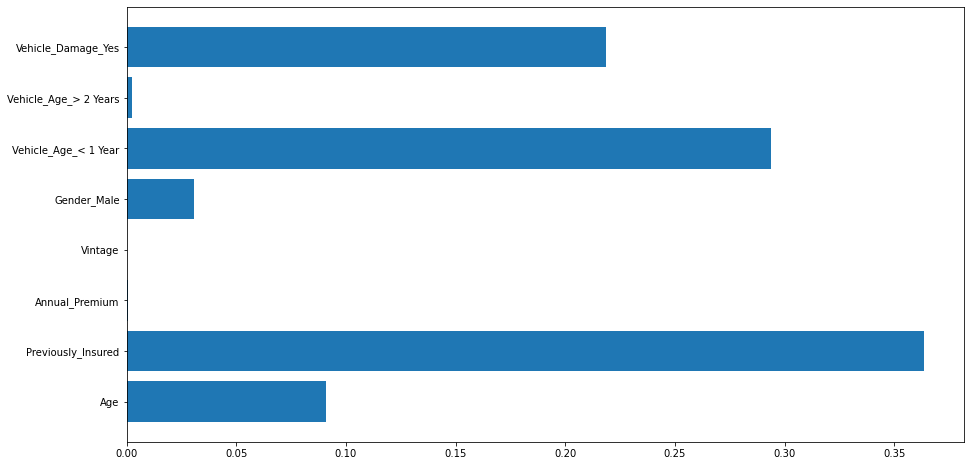

In [35]:
figure(figsize=(15, 8))
plt.barh(X_train.columns, rf_bal.feature_importances_)

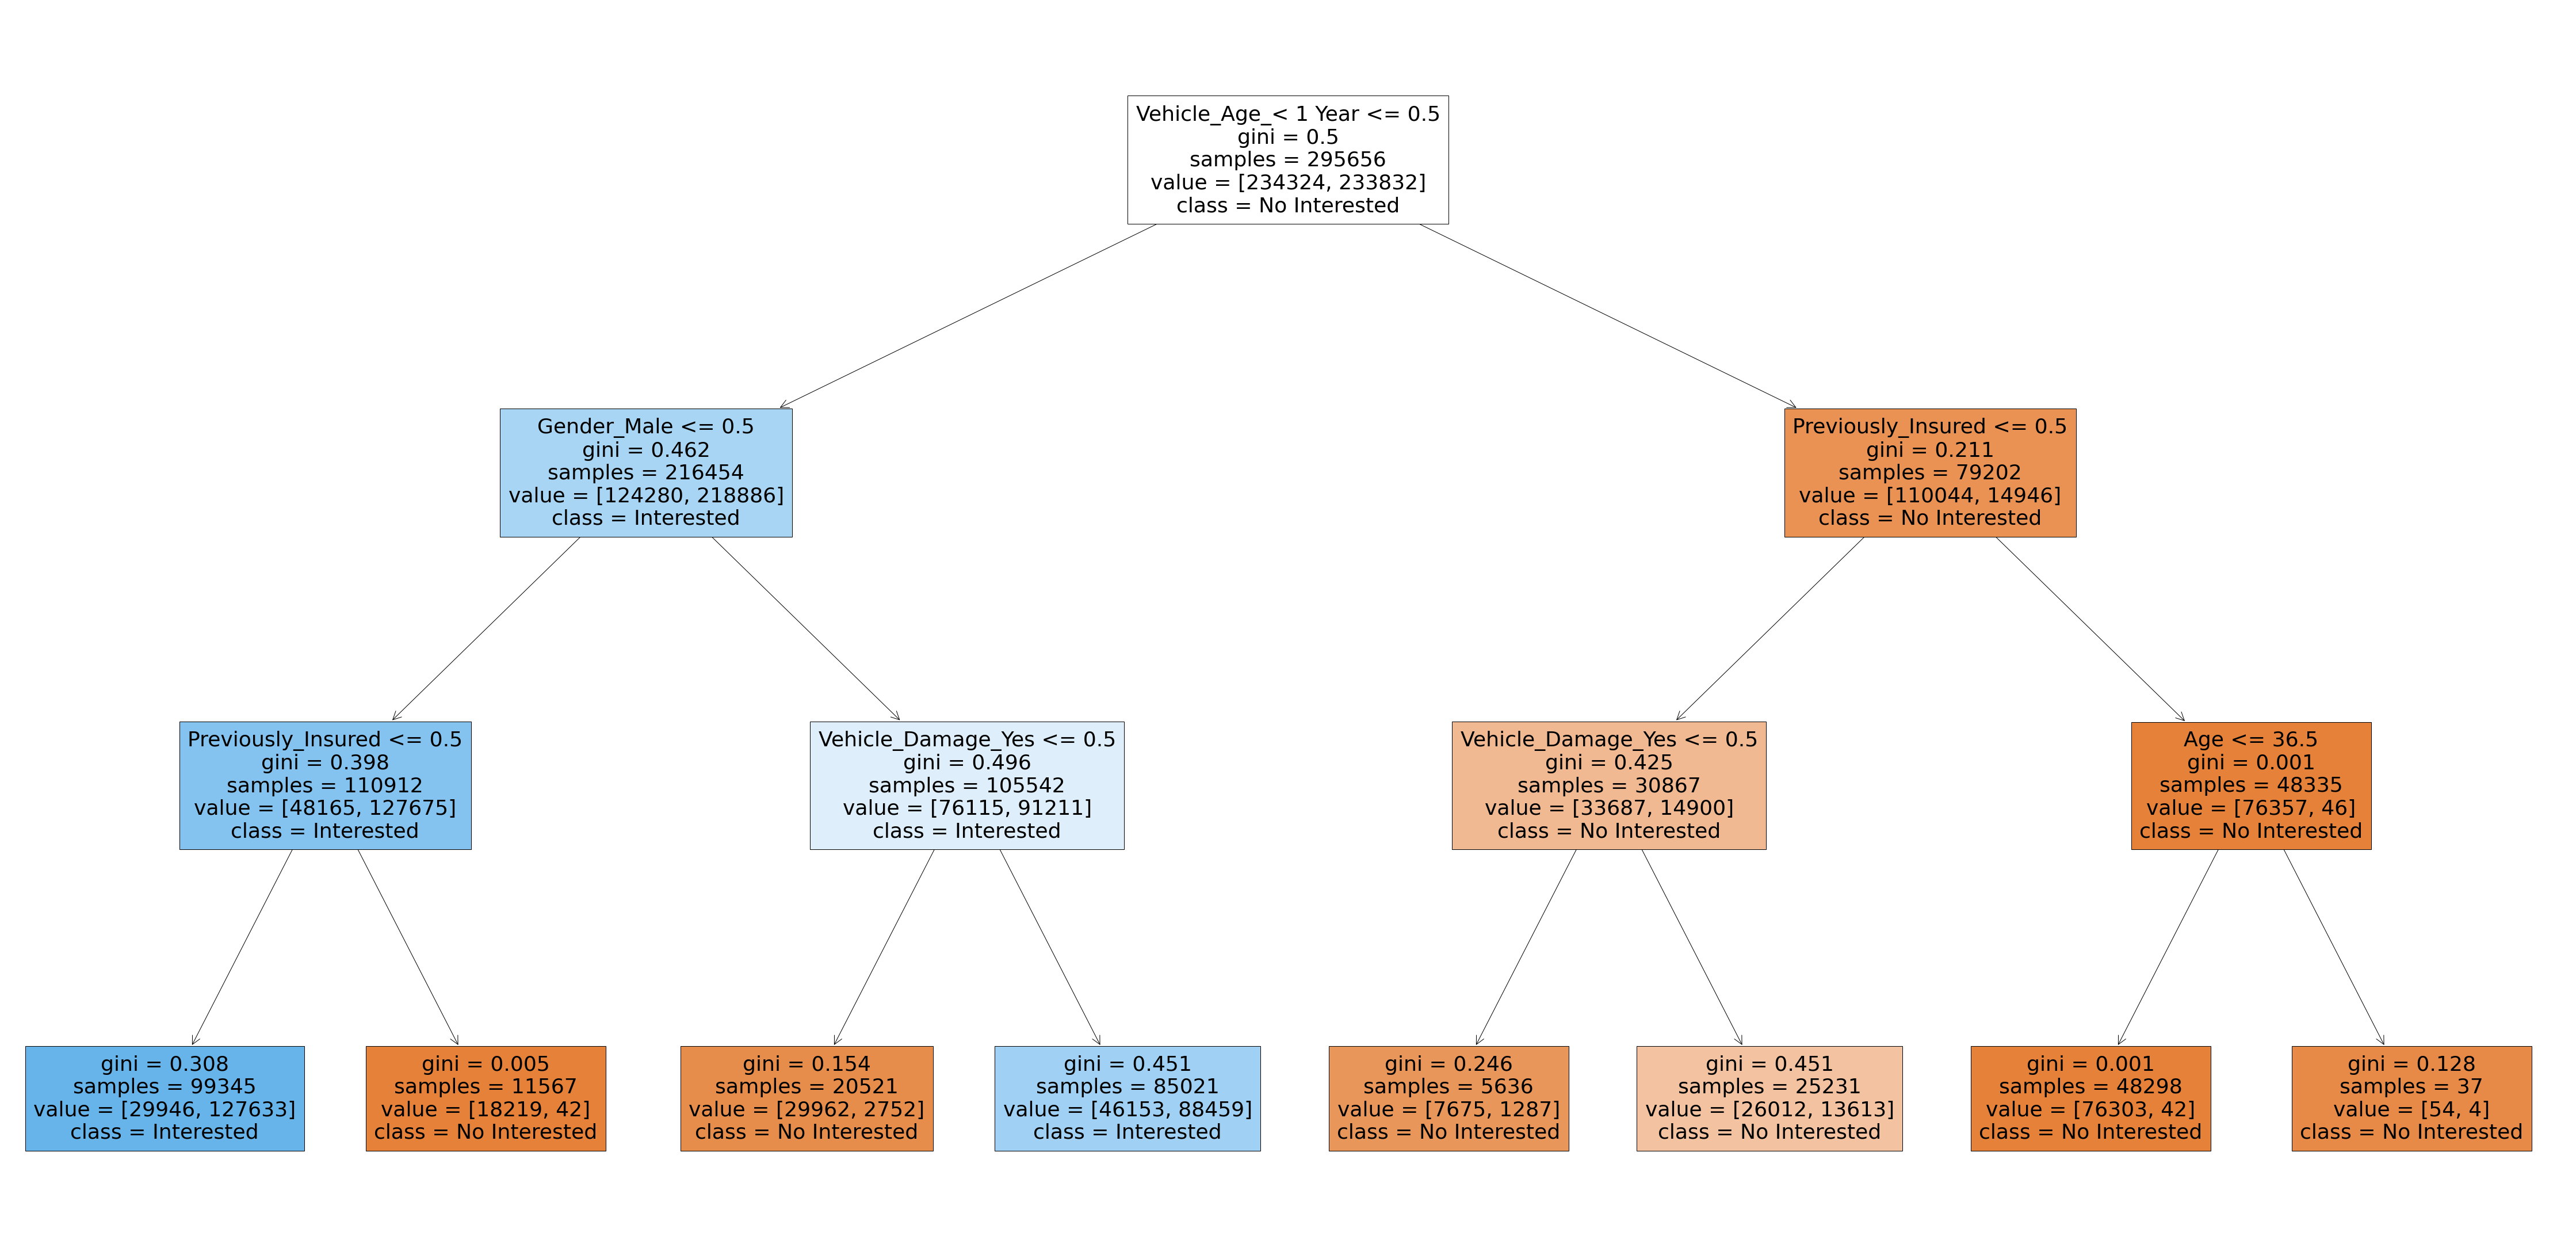

In [36]:
from sklearn.tree import plot_tree
plt.figure(figsize=(80,40))
plot_tree(rf_bal.estimators_[0], feature_names = X_train.columns,class_names=['No Interested', "Interested"],filled=True);

### 5.3.3. Model Comparison

#### 5.3.3.1. Confusion Matrix

In [37]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        #print("Normalized confusion matrix")
    #else:
    #    print('Confusion matrix, without normalization')

    #print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylim([1.5, -0.5]) #added to fix a bug that causes the matrix to be squished
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

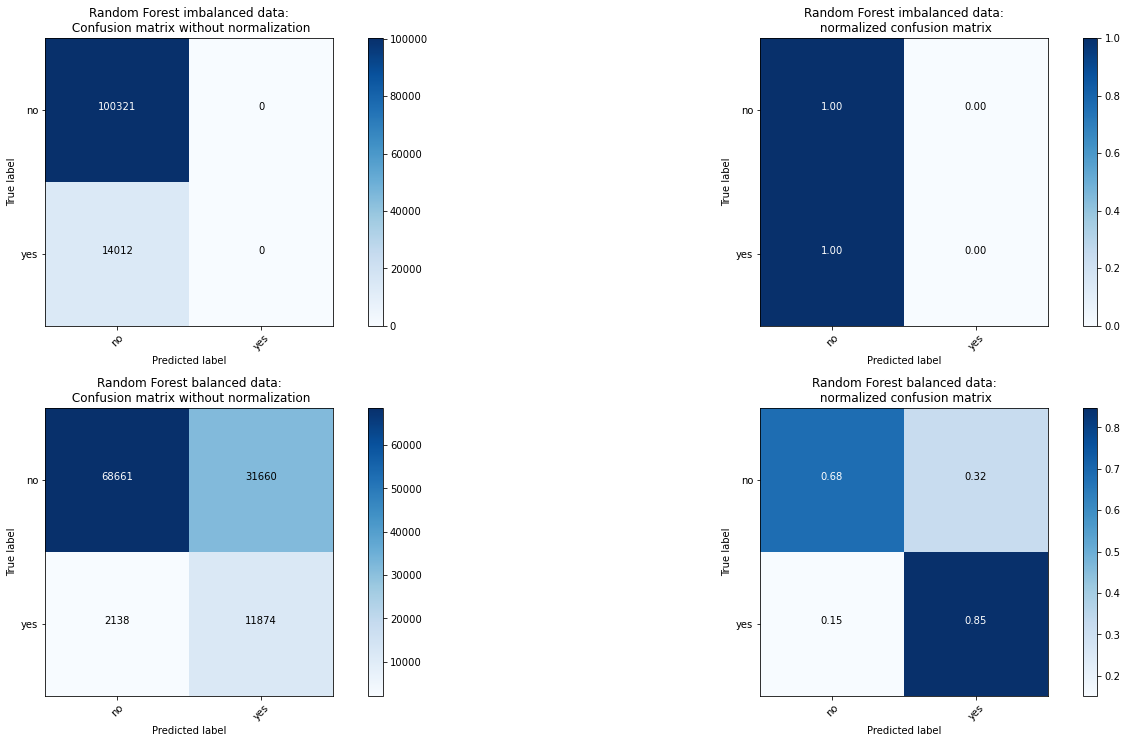

In [38]:
# Compute confusion matrix
class_names = ['no', 'yes']
cnf_matrix_rf_imb = confusion_matrix(y_test, y_pred_rf_imb)
cnf_matrix_rf_bal = confusion_matrix(y_test, y_pred_rf_bal)

np.set_printoptions(precision=2)

plt.figure(figsize=(20, 15))

#Plot K-Nearest Neighbors (imbalanced) confusion matrix
plt.subplot(321) 
plot_confusion_matrix(cnf_matrix_rf_imb, classes=class_names,
                      title='Random Forest imbalanced data:\n Confusion matrix without normalization')

#Plot K-Nearest Neighbors (imbalanced) normalized confusion matrix
plt.subplot(322) 
plot_confusion_matrix(cnf_matrix_rf_imb, classes=class_names, normalize=True,
                      title='Random Forest imbalanced data:\n normalized confusion matrix')

#Plot K-Nearest Neighbors (balanced) confusion matrix
plt.subplot(323) 
plot_confusion_matrix(cnf_matrix_rf_bal, classes=class_names,
                      title='Random Forest balanced data:\n Confusion matrix without normalization')

#Plot K-Nearest Neighbors (balanced) normalized onfusion matrix
plt.subplot(324) 
plot_confusion_matrix(cnf_matrix_rf_bal, classes=class_names, normalize=True,
                      title='Random Forest balanced data:\n normalized confusion matrix')

#### 5.3.3.2. AUC and ROC

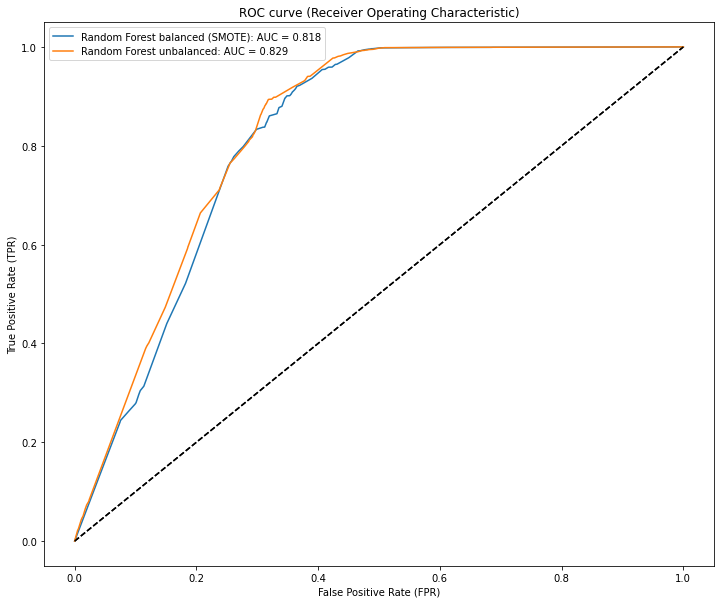

In [39]:
plt.figure(figsize=(12,10))

for test, pred, name in zip([y_test, y_test, y_test], [y_predProba_rf_bal[:,1], y_predProba_rf_imb[:,1]], ['Random Forest balanced (SMOTE)', 'Random Forest unbalanced']):
    fpr, tpr, _ = roc_curve(test, pred)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label='{}: AUC = {}'.format(name, round(roc_auc, 3)))
    plt.legend(loc='best')
    plt.plot([0,1],[0,1],color='black', linestyle='--')

plt.title('ROC curve (Receiver Operating Characteristic)')    
plt.ylabel('True Positive Rate (TPR)')
plt.xlabel('False Positive Rate (FPR)')

plt.show()

## 5.4. K-Nearest Neighbors

### 5.4.1. Feature Scaling

/opt/software/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Annual_Premium'>

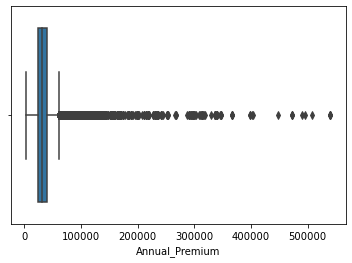

In [40]:
import seaborn as sns
sns.boxplot(data['Annual_Premium'])

In [41]:
from sklearn.preprocessing import RobustScaler

In [42]:
#Rescaling features 'Annual_Premium', Vintage
scaler = RobustScaler()
features = [['Annual_Premium']]
for feature in features:
    X_train[feature] = scaler.fit_transform(X_train[feature])
    X_test[feature] = scaler.fit_transform(X_test[feature])
    X_sm[feature] = scaler.fit_transform(X_sm[feature])

/opt/software/lib/python3.9/site-packages/pandas/core/frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)
/opt/software/lib/python3.9/site-packages/pandas/core/frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


### 5.4.2. Imbalance data

In [43]:
from sklearn.neighbors import KNeighborsClassifier

knn_imb = KNeighborsClassifier().fit(X_train,y_train)

In [44]:
y_pred_knn_imb = knn_imb.predict(X_test)
y_predProba_knn_imb = knn_imb.predict_proba(X_test)
print ("Accuracy is: ", (accuracy_score(y_test, y_pred_knn_imb)*100).round(2))

Accuracy is:  85.56


### 5.4.3. Imbalance data

In [45]:
knn_bal = KNeighborsClassifier().fit(X_sm,y_sm)

In [46]:
y_pred_knn_bal = knn_bal.predict(X_test)
y_predProba_knn_bal = knn_bal.predict_proba(X_test)
print ("Accuracy is: ", (accuracy_score(y_test, y_pred_knn_bal)*100).round(2))

Accuracy is:  72.2


### 5.4.4. Model Comparison

#### 5.4.4.1. Confusion Matrix

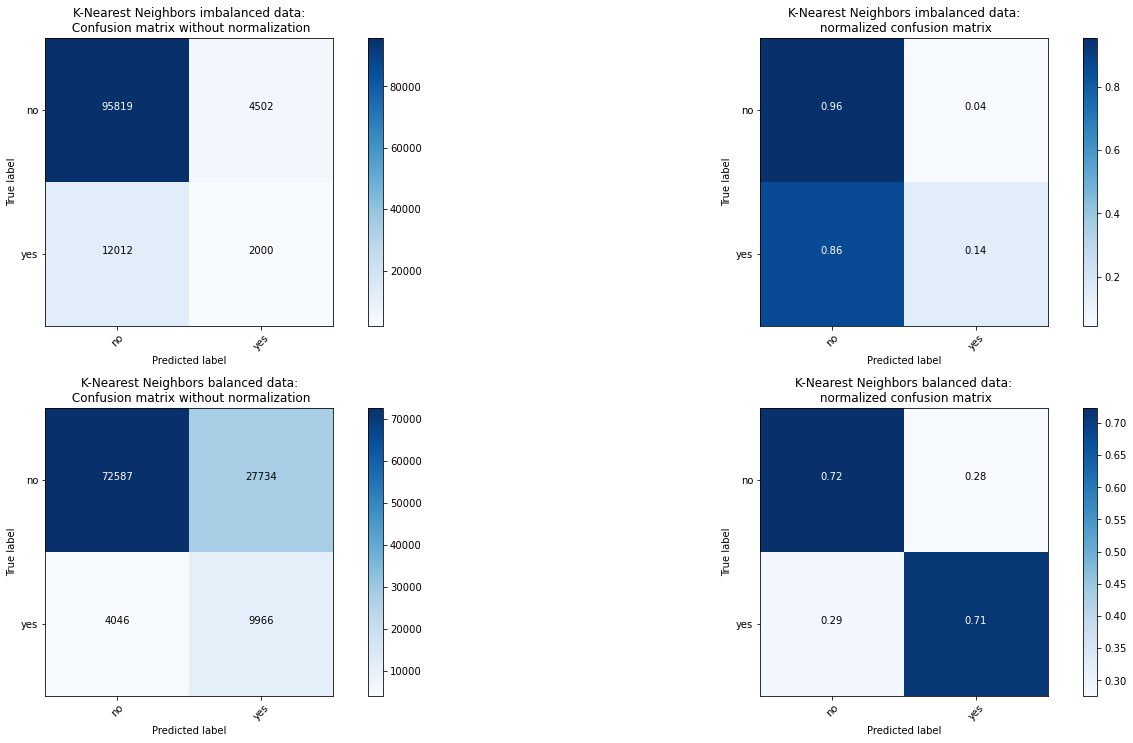

In [47]:
# Compute confusion matrix
class_names = ['no', 'yes']
cnf_matrix_knn_imb = confusion_matrix(y_test, y_pred_knn_imb)
cnf_matrix_knn_bal = confusion_matrix(y_test, y_pred_knn_bal)

np.set_printoptions(precision=2)

plt.figure(figsize=(20, 15))

#Plot K-Nearest Neighbors (imbalanced) confusion matrix
plt.subplot(321) 
plot_confusion_matrix(cnf_matrix_knn_imb, classes=class_names,
                      title='K-Nearest Neighbors imbalanced data:\n Confusion matrix without normalization')

#Plot K-Nearest Neighbors (imbalanced) normalized confusion matrix
plt.subplot(322) 
plot_confusion_matrix(cnf_matrix_knn_imb, classes=class_names, normalize=True,
                      title='K-Nearest Neighbors imbalanced data:\n normalized confusion matrix')

#Plot K-Nearest Neighbors (balanced) confusion matrix
plt.subplot(323) 
plot_confusion_matrix(cnf_matrix_knn_bal, classes=class_names,
                      title='K-Nearest Neighbors balanced data:\n Confusion matrix without normalization')

#Plot K-Nearest Neighbors (balanced) normalized onfusion matrix
plt.subplot(324) 
plot_confusion_matrix(cnf_matrix_knn_bal, classes=class_names, normalize=True,
                      title='K-Nearest Neighbors balanced data:\n normalized confusion matrix')

#### 5.4.4.2. AUC and ROC

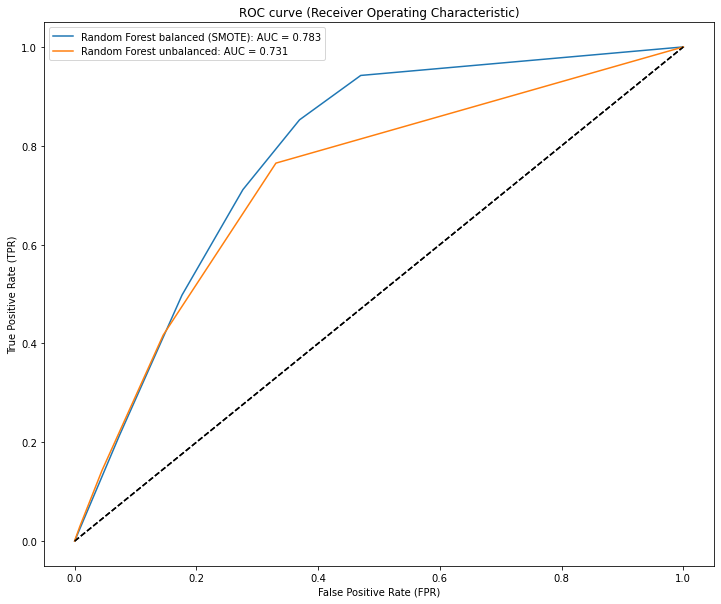

In [48]:
plt.figure(figsize=(12,10))

for test, pred, name in zip([y_test, y_test, y_test], [y_predProba_knn_bal[:,1], y_predProba_knn_imb[:,1]], ['KNN balanced (SMOTE)', 'KNN unbalanced']):
    fpr, tpr, _ = roc_curve(test, pred)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label='{}: AUC = {}'.format(name, round(roc_auc, 3)))
    plt.legend(loc='best')
    plt.plot([0,1],[0,1],color='black', linestyle='--')

plt.title('ROC curve (Receiver Operating Characteristic)')    
plt.ylabel('True Positive Rate (TPR)')
plt.xlabel('False Positive Rate (FPR)')

plt.show()

## 5.5. Neural Network Model

### 5.5.1. Selecting the right model with tuned Hyper-Parameters

In [13]:
import tensorflow as tf
import keras
from keras.layers import Dense, Activation,Dropout
from keras.models import Sequential
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, callbacks

### 5.5.2. Feature Scaling

In [14]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_neural = sc.fit_transform(X_train)
X_test_neural = sc.fit_transform(X_test)

# Feature Scaling
X_train_neural_balanced = sc.fit_transform(X_sm)
X_test_neural_balanced = sc.fit_transform(X_test)

### 5.5.3. Model Building

In [15]:
model=keras.Sequential([layers.Dense(units=1024,activation='relu',input_shape=[8]),
                        layers.BatchNormalization(),
                        layers.Dense(units=1024,activation='relu'),
                        layers.Dropout(0.27),
                        layers.BatchNormalization(),
                        layers.Dense(units=1024,activation='relu'),
                        layers.Dropout(0.27),
                        layers.BatchNormalization(),
                        layers.Dense(units=1024,activation='relu'),
                        layers.Dropout(0.27),
                        layers.BatchNormalization(),
                        layers.Dense(units=1024,activation='relu'),
                        layers.Dropout(0.27),
                        layers.BatchNormalization(),
                        layers.Dense(units=1024,activation='relu'),
                        layers.Dropout(0.27),
                        layers.BatchNormalization(),
                        layers.Dense(units=1024,activation='relu'),
                        layers.Dropout(0.27),
                        layers.BatchNormalization(),
                        layers.Dense(units=1,activation='sigmoid')])

2022-02-09 19:47:41.197238: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [16]:
model.compile(optimizer='Adam',loss='binary_crossentropy', metrics=['accuracy'])


### 5.5.4. Imbalanced Data Fitting

In [53]:
early_stop=callbacks.EarlyStopping(min_delta=0.001, patience=20, restore_best_weights=True)
history = model.fit(X_train_neural, y_train, validation_data=(X_test_neural, y_test), batch_size=512, epochs=100, callbacks=[early_stop])


2022-02-08 09:04:14.438120: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/100
522/522 [==============================] - 446s 850ms/step - loss: 0.3330 - accuracy: 0.8539 - val_loss: 0.2829 - val_accuracy: 0.8774
Epoch 2/100
522/522 [==============================] - 442s 846ms/step - loss: 0.2743 - accuracy: 0.8772 - val_loss: 0.2721 - val_accuracy: 0.8774
Epoch 3/100
522/522 [==============================] - 441s 845ms/step - loss: 0.2733 - accuracy: 0.8773 - val_loss: 0.2764 - val_accuracy: 0.8774
Epoch 4/100
522/522 [==============================] - 442s 846ms/step - loss: 0.2729 - accuracy: 0.8772 - val_loss: 0.2717 - val_accuracy: 0.8774
Epoch 5/100
522/522 [==============================] - 441s 844ms/step - loss: 0.2728 - accuracy: 0.8771 - val_loss: 0.2715 - val_accuracy: 0.8774
Epoch 7/100
522/522 [==============================] - 442s 848ms/step - loss: 0.2726 - accuracy: 0.8773 - val_loss: 0.2725 - val_accuracy: 0.8774
Epoch 8/100
522/522 [==============================] - 428s 821ms/step - loss: 0.2724 - accuracy: 0.8774 - val_loss: 0

#### 5.5.4.1. Loss Visualization

Minimum validation loss: 0.27029088139533997


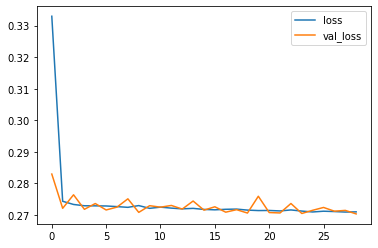

In [55]:
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot();
print("Minimum validation loss: {}".format(history_df['val_loss'].min()))

#### 5.5.4.2. Accuracy Visualization

Minimum validation accuracy: 0.8761249780654907


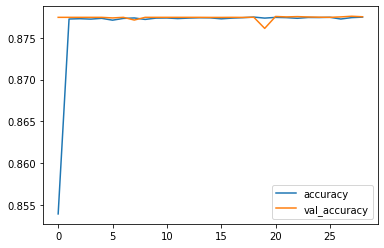

In [57]:
history_df.loc[:, ['accuracy', 'val_accuracy']].plot();
print("Minimum validation accuracy: {}".format(history_df['val_accuracy'].min()))

#### 5.5.4.3. Model Structure Visualization

In [41]:
from keras.utils.vis_utils import plot_model

Fontconfig error: Cannot load default config file



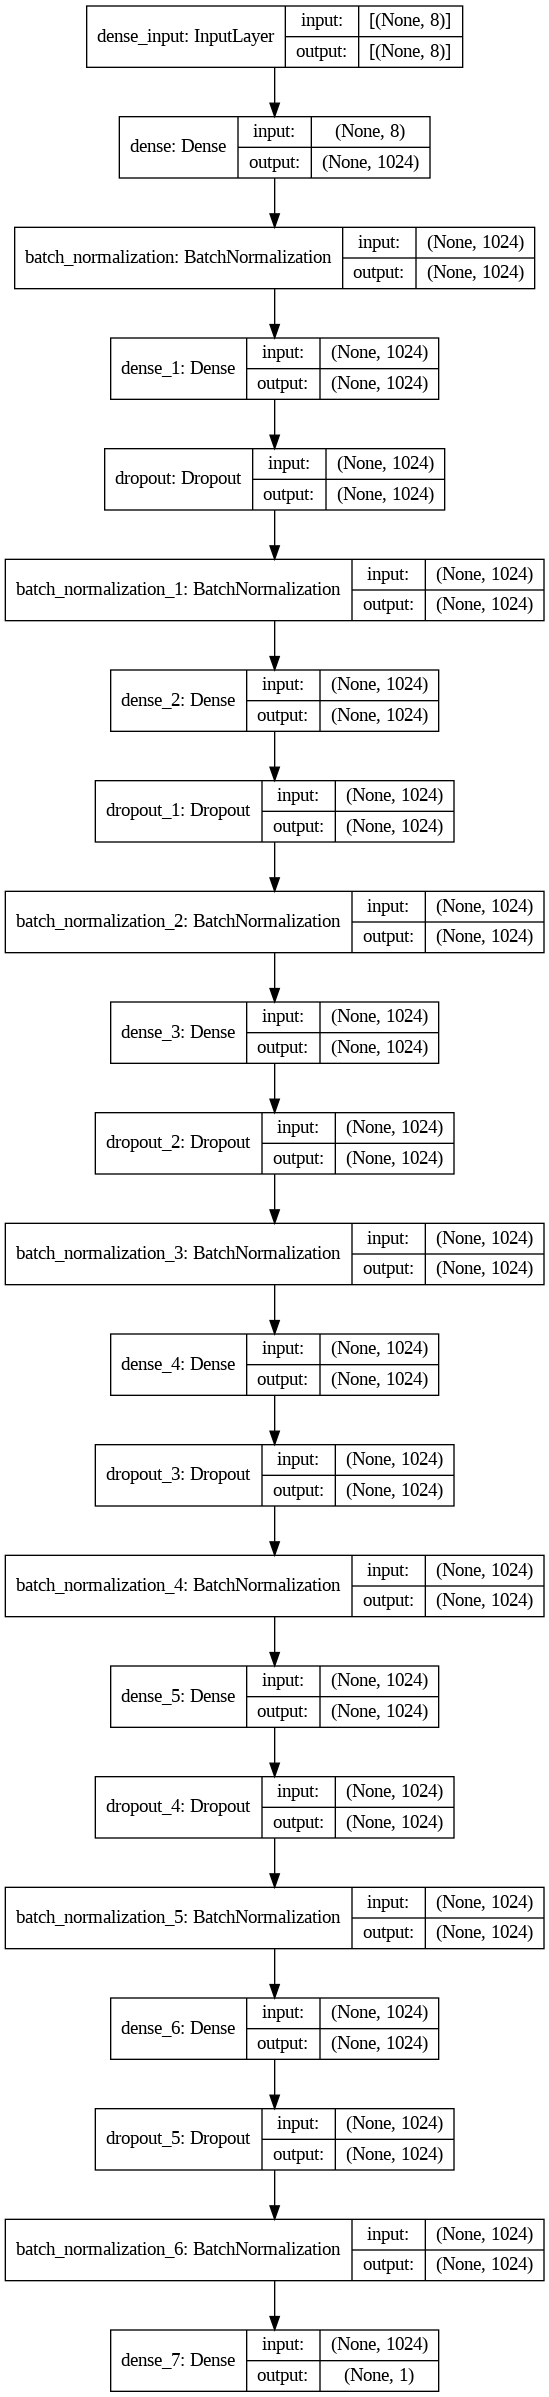

In [42]:
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

### 5.5.5. Balanced Data Fitting

In [18]:
early_stop=callbacks.EarlyStopping(min_delta=0.001, patience=20, restore_best_weights=True)
history_balanced = model.fit(X_train_neural_balanced, y_sm, validation_data =(X_test_neural_balanced, y_test), batch_size=512, epochs=100, callbacks=[early_stop])

2022-02-09 19:47:52.616868: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/100
915/915 [==============================] - 746s 812ms/step - loss: 0.4010 - accuracy: 0.8149 - val_loss: 0.5843 - val_accuracy: 0.6655
Epoch 2/100
915/915 [==============================] - 735s 803ms/step - loss: 0.3899 - accuracy: 0.8184 - val_loss: 0.4627 - val_accuracy: 0.7194
Epoch 3/100
915/915 [==============================] - 737s 806ms/step - loss: 0.3886 - accuracy: 0.8185 - val_loss: 0.5218 - val_accuracy: 0.6868
Epoch 4/100
915/915 [==============================] - 738s 807ms/step - loss: 0.3877 - accuracy: 0.8190 - val_loss: 0.5622 - val_accuracy: 0.6719
Epoch 5/100
915/915 [==============================] - 723s 790ms/step - loss: 0.3871 - accuracy: 0.8198 - val_loss: 0.5607 - val_accuracy: 0.6942
Epoch 6/100
915/915 [==============================] - 719s 785ms/step - loss: 0.3866 - accuracy: 0.8198 - val_loss: 0.5349 - val_accuracy: 0.6692
Epoch 7/100
915/915 [==============================] - 728s 796ms/step - loss: 0.3863 - accuracy: 0.8202 - val_loss: 0

#### 5.5.5.1. Loss Visualization

Minimum validation loss: 0.4627434015274048


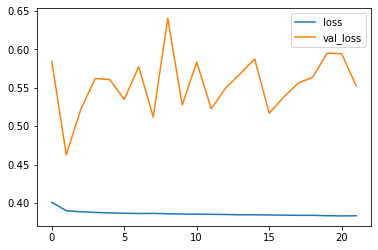

In [29]:
history_df_balanced = pd.DataFrame(history_balanced.history)
history_df_balanced.loc[:, ['loss', 'val_loss']].plot();
print("Minimum validation loss: {}".format(history_df_balanced['val_loss'].min()))

#### 5.5.5.2. Accuracy Visualization

Minimum validation accuracy: 0.6461214423179626


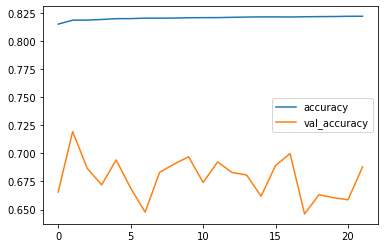

In [30]:
history_df_balanced.loc[:, ['accuracy', 'val_accuracy']].plot();
print("Minimum validation accuracy: {}".format(history_df_balanced['val_accuracy'].min()))

#### Conclusion for Neural Network Moddel

We used both the imbalanced and balanced data in this training. Then we standardized the data by using Standard Scaler. We used the testing data set as the validation data in this model. 

According to the validation accuracy, the imbalanced set performed better than the balanced one. We guessed the reason is: the y_lable  we used for the validation is still imbalanced. Q: Should we use SMOTE for neural network?